# <center> Deep Learning-Based Human Activity Recognition for Smartwatch Sensor Data: Enhancing Wellness through Fundamental Activity Identification
### <center><b> Lucas, Sydney Anne  |  Peñamora, Dean Avior | Perez, Paul Angelo | Quipit, Dale Russel

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
sns.set_context('notebook')
plt.rcParams['font.family'] = 'Globotipo Rounded'

In [3]:
# the plt.rcParams line can be converted into comments, in any case the typeface indicated is not installed locally.

<a name="top"></a>
### Table of Contents:

[ref0]: #ex_sum
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #dat_prep
- [Data Preprocessing][ref2]

    [ref10]: #phone_det
    - [Phone Details][ref10]
    
    [ref11]: #watch_det
    - [Watch Details][ref11]
 
[ref3]: #dat_expl
- [Data Exploration of Activities][ref3]

[ref4]: #dat_ex
- [Data Exploration of the 5 Chosen Activities][ref4]

[ref5]: #act
- [The 5 Activity Data Discussion][ref5]

[ref6]: #watch_data
- [Watch Data][ref6]

[ref7]: #comb_data
- [Combined Watch Acceleration and Gyro model][ref7]

[ref8]: #conc
- [Conclusion and Recommendations][ref8]

[ref9]: #refe
- [References][ref9]

***

<a name="ex_sum"></a>
# Executive Summary
***
In an era characterized by the ubiquity of wearable technology, the integration of sensors in everyday devices has facilitated the collection of vast amounts of data, offering unprecedented insights into human behavior and activity patterns. Smartwatches, equipped with accelerometers and gyroscopes that capture the body's movements along the x, y, and z axes, stand at the forefront of this revolution, enabling continuous monitoring of users' movements with high precision and accuracy. Harnessing this wealth of data presents a myriad of opportunities, from promoting healthy lifestyles through personalized fitness tracking (Mathie et al., 2014) to enabling real-time health monitoring for individuals with chronic conditions (Shoaib et al., 2014).  

The focus of this study lies in leveraging deep learning techniques to develop a prediction model capable of accurately identifying fundamental human activities using sensor data from smartwatches. Specifically, we employ the WISDM (Wireless Sensor Data Mining) dataset, a comprehensive repository of sensor readings captured from smart devices worn by individuals in real-world settings. By filtering the dataset to include only basic daily human activities—standing, sitting, walking, jogging, and going up/down stairs—we aim to create a model tailored to recognize common movements encountered in everyday life. The selection of these activities is underpinned by previous research highlighting their significance in understanding human behavior and health. Studies have shown that these activities constitute the core components of daily routines and are essential for assessing overall physical fitness and well-being (Liu et al., 2022). Moreover, the ability to accurately classify these activities lays the foundation for developing applications ranging from activity tracking and fitness monitoring to fall detection systems. 

The utilization of deep learning techniques for human activity recognition (HAR) from smartwatch sensor data has showcased remarkable success, as evidenced by several recent studies. For instance, Oniga et al. (2020) demonstrated an impressive accuracy rate of over 91% by employing a fusion of convolutional neural networks (CNNs) and long short-term memory (LSTM) networks to recognize 15 distinct activities. This hybrid approach enables the model to effectively capture both spatial and temporal features inherent in human movement data, thereby enhancing the robustness of activity classification. Similarly, Yu et al. (2018) leveraged a CNN-based methodology to classify six activities with an average accuracy exceeding 94%. By exploiting the hierarchical feature learning capabilities of CNNs, their model demonstrated superior performance in discerning subtle nuances across different activities, contributing to its high accuracy. By building upon the existing body of research and utilizing state-of-the-art deep learning methodologies, this study endeavors to contribute to the advancement of activity recognition systems, fostering innovations that have the potential to revolutionize healthcare, fitness tracking, and assistive technologies. Through the synthesis of data science and wearable technology, we aspire to empower individuals with actionable insights into their daily activities, promoting healthier and more active lifestyles.  

In the subsequent sections, we explore into the methodology employed for data preprocessing, exploratory data analysis, model development specifically using tensor flow, and evaluation, followed by the presentation and analysis of results. Finally, we discuss the implications of our findings and avenues for future research, underscoring the transformative potential of deep learning in activity recognition and its broader implications for human-centric applications. 
[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
# Problem Statement
***
Despite the significant advancements in deep learning-based Human Activity Recognition (HAR) using smartwatch sensor data, there remains a need for models optimized for accurately identifying fundamental daily activities. The integration of accelerometers and gyroscopes into smartwatches has enabled the continuous monitoring of human movements, presenting an opportunity to develop prediction models for identifying fundamental daily activities. 

This case study aims to address this gap by developing a deep learning prediction model specifically designed to classify five core activities: standing, sitting, walking, jogging, and going up/down stairs. The model will leverage the WISDM dataset, focusing on these essential movements to: 

1. Develop a deep learning model capable of accurately classifying basic daily human activities, including standing, sitting, walking, jogging, and going up/down stairs, by randomly selecting samples from the dataset and feeding them into the trained model. 

2. Optimize processing efficiency by concentrating on well-defined movement patterns. 

3. Facilitate the development of real-world applications, such as personalized fitness tracking and fall detection systems, which rely on precise identification of these fundamental activities. 

By achieving these objectives, this study seeks to contribute to the advancement of HAR systems, unlocking the full potential of wearable technology to improve health monitoring, fitness management, and overall well-being. 
[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
# Data Preprocessing
***

<a name="phone_det"></a>
## Phone details

### Acceleration

In [4]:
df = pd.read_csv(r"C:\Users\Ebo\Downloads\wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset\wisdm-dataset\wisdm-dataset\raw\phone\accel\data_1600_accel_phone.txt")

# Display the DataFrame
(df)

,1600,A,252207666810782,-0.36476135,8.793503,1.0550842;
0,1600,A,252207717164786,-0.879730,9.768784,1.0169983;
1,1600,A,252207767518790,2.001495,11.109070,2.619156;
2,1600,A,252207817872794,0.450623,12.651642,0.18455505;
3,1600,A,252207868226798,-2.164352,13.928436,-4.4224854;
4,1600,A,252207918580802,-4.332779,13.361191,-0.7188721;
...,...,...,...,...,...,...
64305,1600,S,244505660942200,-2.372223,9.242722,-1.5882874;
64306,1600,S,244505711296204,-2.046921,10.032288,-1.2299347;
64307,1600,S,244505761650208,-1.393539,9.883896,-0.47924805;
64308,1600,S,244505812004212,-1.230454,9.315079,-0.15570068;


In [5]:
df.describe().round(2)

,1600,252207666810782,-0.36476135,8.793503
count,64310.0,6.431000e+04,64310.00,64310.00
mean,1600.0,2.485597e+14,0.61,7.95
std,0.0,4.552246e+12,2.88,2.85
min,1600.0,2.415986e+14,-19.57,-9.48
25%,1600.0,2.444160e+14,-1.75,6.74
50%,1600.0,2.512332e+14,1.45,7.74
75%,1600.0,2.528529e+14,2.90,9.50
max,1600.0,2.543511e+14,14.44,19.61


In [6]:
# Phone acceleration
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data_phone_accel_sum = pd.DataFrame(data=None, columns=columns)

phone_directory = r"C:\Users\Ebo\Downloads\wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset\wisdm-dataset\wisdm-dataset\raw\phone\accel"

for dirname, _, filenames in os.walk(phone_directory):
    for filename in filenames:
        if filename != '.DS_Store':
            file_path = os.path.join(dirname, filename)
            try:
                df = pd.read_csv(file_path, sep=",", header=None)
                temp = pd.DataFrame(data=df.values, columns=columns)
                data_phone_accel_sum = pd.concat([data_phone_accel_sum, temp])
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")

print("Data loading complete.")

Data loading complete.


In [7]:
data_phone_accel_sum['z'] = data_phone_accel_sum['z'].str.replace(';','')
data_phone_accel_sum['activity'].value_counts()
data_phone_accel_sum['x']=data_phone_accel_sum['x'].astype('float')
data_phone_accel_sum['y']=data_phone_accel_sum['y'].astype('float')
data_phone_accel_sum['z']=data_phone_accel_sum['z'].astype('float')

display(data_phone_accel_sum)

,user,activity,time,x,y,z
0,1600,A,252207666810782,-0.364761,8.793503,1.055084
1,1600,A,252207717164786,-0.879730,9.768784,1.016998
2,1600,A,252207767518790,2.001495,11.109070,2.619156
3,1600,A,252207817872794,0.450623,12.651642,0.184555
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485
...,...,...,...,...,...,...
160774,1650,S,357734078421000,-8.234077,-4.275110,-1.439407
160775,1650,S,357734098619000,-8.080796,-4.418811,-1.415457
160776,1650,S,357734118715000,-7.994575,-4.457131,-1.441802
160777,1650,S,357734138868000,-8.040081,-4.366121,-1.496887


In [8]:
data_phone_accel_sum['activity'].value_counts()

activity
K    285190
A    279817
M    278766
P    272730
O    272219
H    270756
G    269609
E    269604
B    268409
R    268065
L    265781
S    265214
D    264592
I    261360
Q    260497
C    255645
J    249793
F    246356
Name: count, dtype: int64

### Gyroscope

In [9]:
data_phone_gyro_sum = pd.DataFrame(data=None, columns=columns)

phone_directory = r"C:\Users\Ebo\Downloads\wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset\wisdm-dataset\wisdm-dataset\raw\phone\gyro"

for dirname, _, filenames in os.walk(phone_directory):
    for filename in filenames:
        if filename != '.DS_Store':
            file_path = os.path.join(dirname, filename)
            try:
                df = pd.read_csv(file_path, sep=",", header=None)
                temp = pd.DataFrame(data=df.values, columns=columns)
                data_phone_gyro_sum = pd.concat([data_phone_gyro_sum, temp])
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")

print("Data loading complete.")

Data loading complete.


In [10]:
data_phone_gyro_sum['z'] = data_phone_gyro_sum['z'].str.replace(';','')

data_phone_gyro_sum['x']=data_phone_gyro_sum['x'].astype('float')
data_phone_gyro_sum['y']=data_phone_gyro_sum['y'].astype('float')
data_phone_gyro_sum['z']=data_phone_gyro_sum['z'].astype('float')

data_phone_gyro_sum['activity'].value_counts()
data_phone_gyro_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3608635 entries, 0 to 80347
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      object 
 1   activity  object 
 2   time      object 
 3   x         float64
 4   y         float64
 5   z         float64
dtypes: float64(3), object(3)
memory usage: 192.7+ MB


In [11]:
data_phone_gyro_sum['activity'].value_counts()

activity
A    203919
M    202625
G    202622
H    202408
K    202395
D    202370
E    202351
P    202331
R    202330
S    202321
B    200252
O    198756
L    197915
I    197905
Q    197894
C    197857
J    197844
F    194540
Name: count, dtype: int64

In [12]:
data_phone_accel_sum['activity'].value_counts()

activity
K    285190
A    279817
M    278766
P    272730
O    272219
H    270756
G    269609
E    269604
B    268409
R    268065
L    265781
S    265214
D    264592
I    261360
Q    260497
C    255645
J    249793
F    246356
Name: count, dtype: int64

<a name="watch_det"></a>
## Watch details

### Acceleration

In [13]:
data_watch_accel_sum = pd.DataFrame(data=None, columns=columns)

watch_directory = r"C:\Users\Ebo\Downloads\wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset\wisdm-dataset\wisdm-dataset\raw\watch\accel"

for dirname, _, filenames in os.walk(watch_directory):
    for filename in filenames:
        if filename != '.DS_Store':
            file_path = os.path.join(dirname, filename)
            try:
                df = pd.read_csv(file_path, sep=",", header=None)
                temp = pd.DataFrame(data=df.values, columns=columns)
                data_watch_accel_sum = pd.concat([data_watch_accel_sum, temp])
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")

print("Data loading complete.")

Data loading complete.


In [14]:
data_watch_accel_sum['z'] = data_watch_accel_sum['z'].str.replace(';','')

data_watch_accel_sum['x']=data_watch_accel_sum['x'].astype('float')
data_watch_accel_sum['y']=data_watch_accel_sum['y'].astype('float')
data_watch_accel_sum['z']=data_watch_accel_sum['z'].astype('float')

data_watch_accel_sum['activity'].value_counts()
data_watch_accel_sum

,user,activity,time,x,y,z
0,1600,A,90426708196641,7.091625,-0.591667,8.195502
1,1600,A,90426757696641,4.972757,-0.158317,6.696732
2,1600,A,90426807196641,3.253720,-0.191835,6.107758
3,1600,A,90426856696641,2.801216,-0.155922,5.997625
4,1600,A,90426906196641,3.770868,-1.051354,7.731027
...,...,...,...,...,...,...
66587,1650,S,2426184421424592,1.486500,-13.302334,5.355231
66588,1650,S,2426184471411932,4.017171,-13.146711,5.118205
66589,1650,S,2426184521399272,4.412214,-15.318253,3.370437
66590,1650,S,2426184571385262,4.426579,-13.012636,2.575563


### Gyroscope

In [15]:
data_watch_gyro_sum = pd.DataFrame(data=None, columns=columns)

watch_directory = r"C:\Users\Ebo\Downloads\wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset\wisdm-dataset\wisdm-dataset\raw\watch\gyro"

for dirname, _, filenames in os.walk(watch_directory):
    for filename in filenames:
        if filename != '.DS_Store':
            file_path = os.path.join(dirname, filename)
            try:
                df = pd.read_csv(file_path, sep=",", header=None)
                temp = pd.DataFrame(data=df.values, columns=columns)
                data_watch_gyro_sum = pd.concat([data_watch_gyro_sum, temp])
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")

print("Data loading complete.")

Data loading complete.


In [16]:
data_watch_gyro_sum['z'] = data_watch_gyro_sum['z'].str.replace(';','')

data_watch_gyro_sum['x']=data_watch_gyro_sum['x'].astype('float')
data_watch_gyro_sum['y']=data_watch_gyro_sum['y'].astype('float')
data_watch_gyro_sum['z']=data_watch_gyro_sum['z'].astype('float')

data_watch_gyro_sum['activity'].value_counts()
data_watch_gyro_sum

,user,activity,time,x,y,z
0,1600,A,90426757696641,0.314944,-1.022277,-0.309962
1,1600,A,90426807196641,0.387382,-0.618541,-0.048972
2,1600,A,90426856696641,0.070999,-0.209480,-0.195978
3,1600,A,90426906196641,0.037975,0.254976,-0.156563
4,1600,A,90426955696641,0.073129,0.719431,-0.001035
...,...,...,...,...,...,...
66551,1650,S,2426184371437252,-2.856065,2.057101,0.853933
66552,1650,S,2426184421424592,-2.911458,1.817417,1.281104
66553,1650,S,2426184471411932,-3.015854,1.550036,2.057682
66554,1650,S,2426184521399272,-3.218254,1.595842,3.018550


In [17]:
data_watch_accel_sum['activity'].value_counts()

activity
E    216529
K    215879
Q    215365
D    213018
P    212810
S    211335
A    210495
O    210107
I    210048
M    209491
H    209483
R    208734
G    208720
C    207312
B    205787
F    205137
L    203684
J    203112
Name: count, dtype: int64

In [18]:
data_watch_gyro_sum['activity'].value_counts()

activity
K    197917
Q    197403
D    195050
P    194845
E    194103
S    193373
A    192531
I    192085
M    191535
R    190776
G    190759
L    190191
J    189609
B    187833
O    187684
F    187175
H    187057
C    180416
Name: count, dtype: int64

<a name="dat_expl"></a>
# Data Exploration of Activities
***

In [19]:
column_name = 'activity'
specific_values = ['A', 'C', 'D', 'E', 'B']

filtered_phoneacc = data_phone_accel_sum[data_phone_accel_sum[column_name].isin(specific_values)]
filtered_phonegyr = data_phone_gyro_sum[data_phone_gyro_sum[column_name].isin(specific_values)]
filtered_watchacc = data_watch_accel_sum[data_watch_accel_sum[column_name].isin(specific_values)]
filtered_watchgyr = data_watch_gyro_sum[data_watch_gyro_sum[column_name].isin(specific_values)]

In [20]:
print(filtered_phoneacc['activity'].shape)
print(filtered_phonegyr['activity'].shape)
print(filtered_watchacc['activity'].shape)
print(filtered_watchgyr['activity'].shape)

(1338067,)
(1006749,)
(1053141,)
(949933,)


In [21]:
filtered_phoneacc

,user,activity,time,x,y,z
0,1600,A,252207666810782,-0.364761,8.793503,1.055084
1,1600,A,252207717164786,-0.879730,9.768784,1.016998
2,1600,A,252207767518790,2.001495,11.109070,2.619156
3,1600,A,252207817872794,0.450623,12.651642,0.184555
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485
...,...,...,...,...,...,...
44658,1650,E,357079523549000,-8.461604,-3.386558,-1.930386
44659,1650,E,357079543741000,-8.459209,-3.405718,-1.360371
44660,1650,E,357079563837000,-8.571775,-3.436853,-1.008303
44661,1650,E,357079584047000,-8.456815,-3.535049,-0.744851


In [22]:
filtered_watchacc

,user,activity,time,x,y,z
0,1600,A,90426708196641,7.091625,-0.591667,8.195502
1,1600,A,90426757696641,4.972757,-0.158317,6.696732
2,1600,A,90426807196641,3.253720,-0.191835,6.107758
3,1600,A,90426856696641,2.801216,-0.155922,5.997625
4,1600,A,90426906196641,3.770868,-1.051354,7.731027
...,...,...,...,...,...,...
19766,1650,E,2425530061425505,2.487276,-1.676091,10.124480
19767,1650,E,2425530111418155,2.851195,-1.702427,9.988011
19768,1650,E,2425530161410805,2.884714,-1.611447,9.664794
19769,1650,E,2425530211403455,2.827253,-1.769465,9.284116


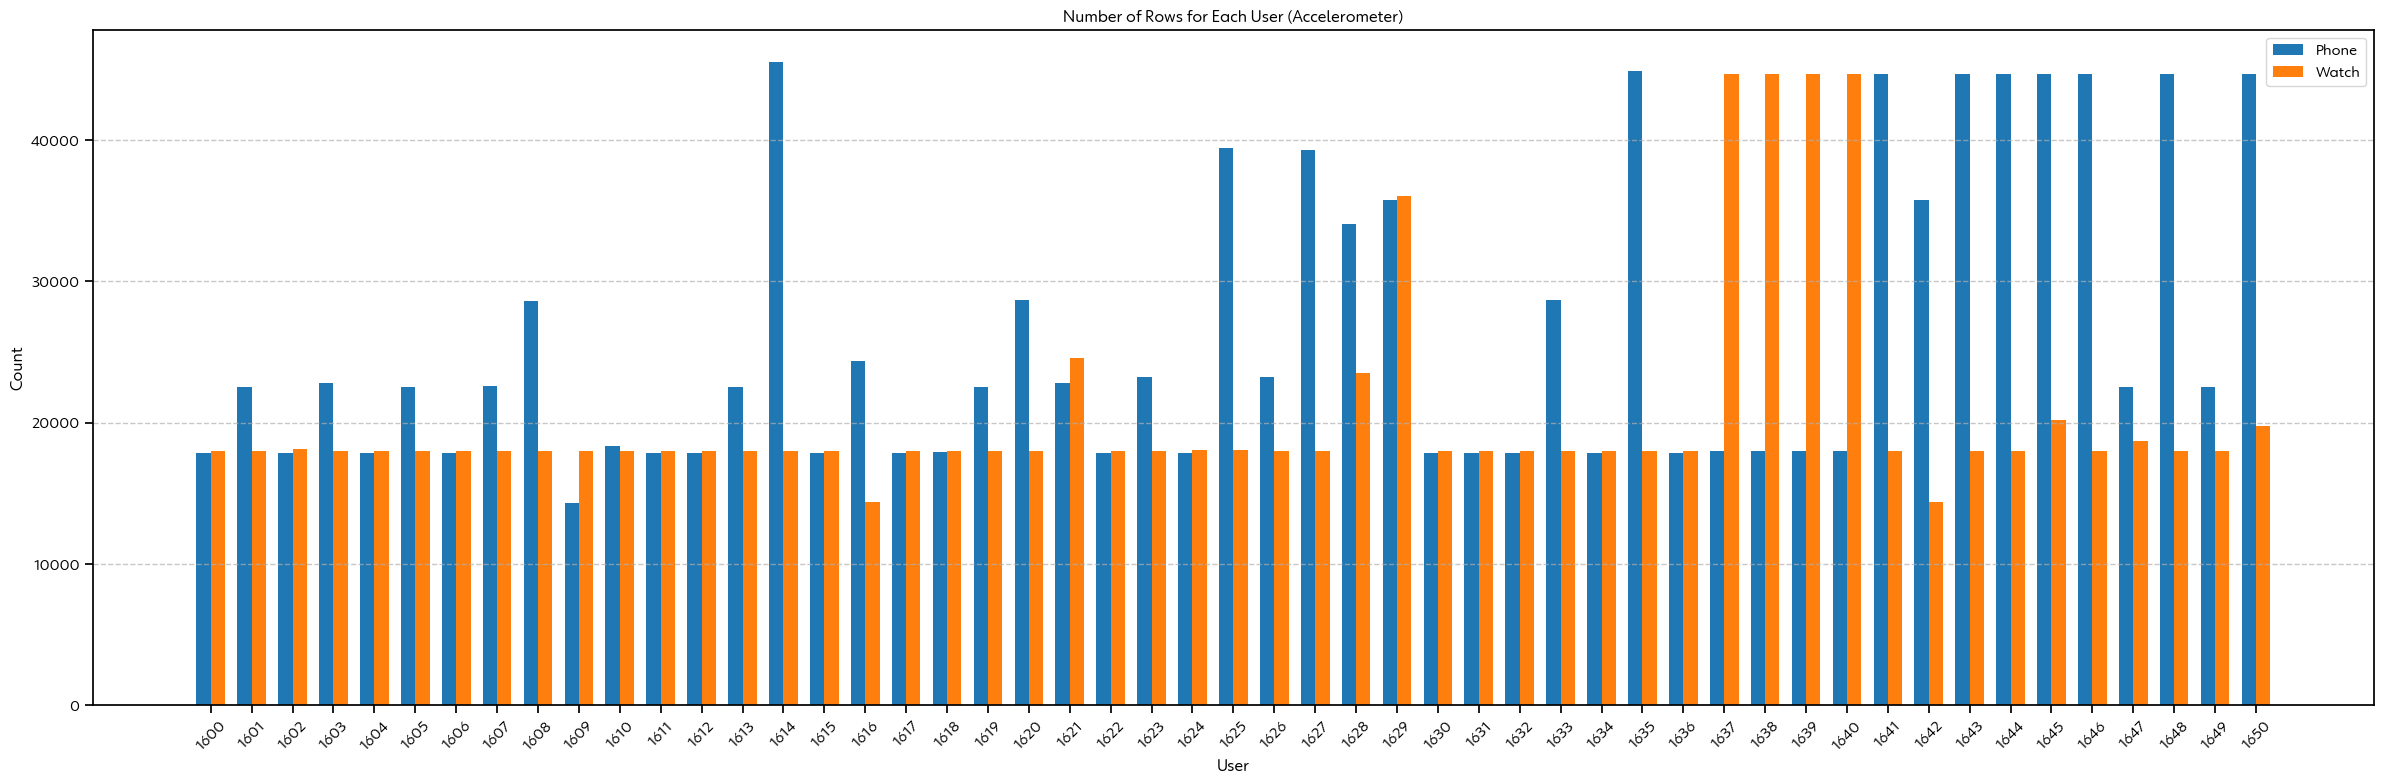

In [23]:
# Get the value counts of the 'activity' column
activity_counts1 = filtered_phoneacc['user'].value_counts()
activity_counts2 = filtered_watchacc['user'].value_counts()

# Plot a bar chart
all_activities = sorted(set(activity_counts1.index) | set(activity_counts2.index))

# Create bar chart
bar_width = 0.35
index = range(len(all_activities))

plt.figure(figsize=(24, 8))
plt.bar(index, activity_counts1.reindex(all_activities), bar_width, label='Phone')
plt.bar([i + bar_width for i in index], activity_counts2.reindex(all_activities), bar_width, label='Watch')

plt.title('Number of Rows for Each User (Accelerometer)')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks([i + bar_width/2 for i in index], all_activities, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The bar chart illustrates a comparative analysis of the number of rows, or data points, attributed to each user in both phone accelerometer and watch accelerometer data sets. Users are represented along the x-axis, while the count of data points is showcased on the y-axis. Employing distinct bar colors for phone and watch data sets, the visualization distinctly reveals that the phone data, indicated by the blue bars, consistently surpasses the watch data. Specifically, the chart highlights a notable disparity in the distribution of data points, with nine phone users reaching a count of 40,000 data points. In contrast, only four watch users achieved the exact count. Such a graphical representation offers valuable insights into the distribution of accelerometer data across various users, emphasizing the significant prevalence of phone-generated data over watch-generated data, particularly among users with higher data point counts. 
***

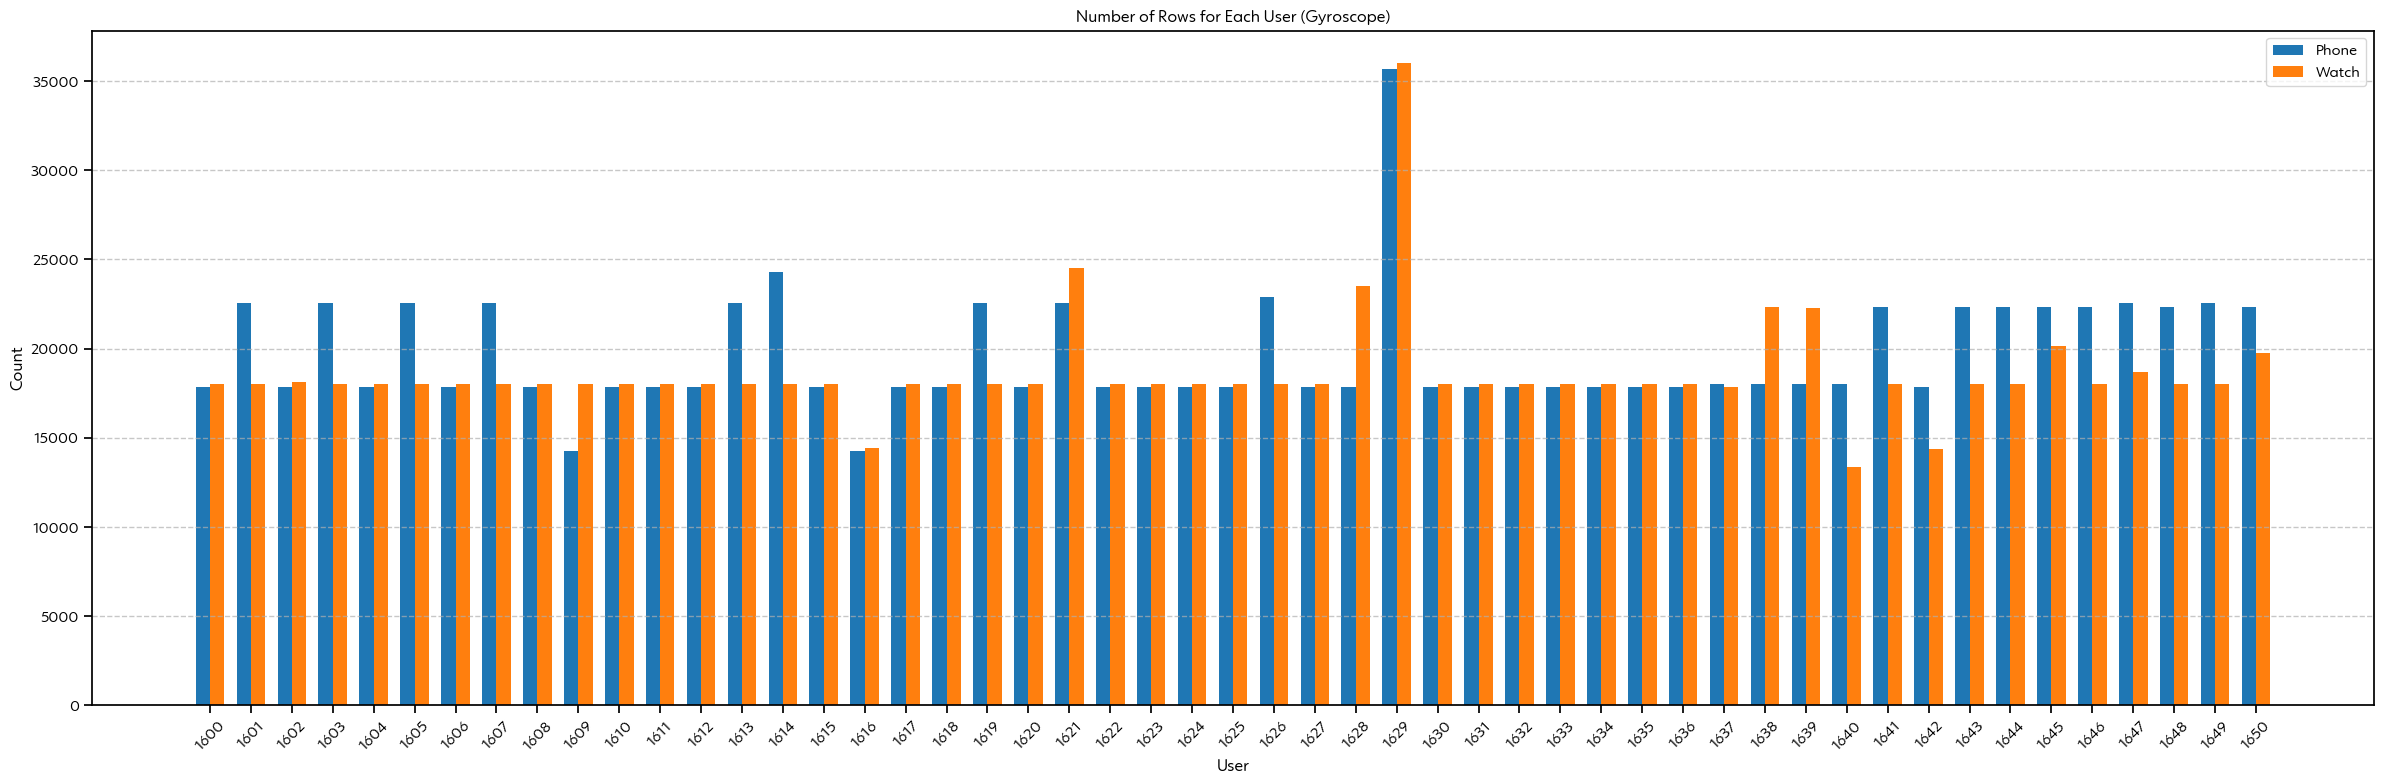

In [24]:
# Get the value counts of the 'activity' column
activity_counts1 = filtered_phonegyr['user'].value_counts()
activity_counts2 = filtered_watchgyr['user'].value_counts()

# Plot a bar chart
all_activities = sorted(set(activity_counts1.index) | set(activity_counts2.index))

# Create bar chart
bar_width = 0.35
index = range(len(all_activities))

plt.figure(figsize=(24, 8))
plt.bar(index, activity_counts1.reindex(all_activities), bar_width, label='Phone')
plt.bar([i + bar_width for i in index], activity_counts2.reindex(all_activities), bar_width, label='Watch')

plt.title('Number of Rows for Each User (Gyroscope)')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks([i + bar_width/2 for i in index], all_activities, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The bar chart compares the number of rows, or data points, for each user in both phone gyroscope and watch gyroscope datasets. Users are shown on the x-axis, while the count of data points is displayed on the y-axis. Different bar colors represent phone and watch data, making distinguishing between the two datasets easy. While the chart shows similarities between phone and watch data distributions, especially for counts below 20,000, notable differences emerge as counts go beyond 20,000. Specifically, phone data tends to be higher than watch data for counts exceeding 20,000. However, an interesting observation is noted for user 1629, where both phone and watch data exceed 35,000 counts, with watch data slightly higher than phone data. These findings highlight the intricacies of data distribution across users and sensors, offering valuable insights for further analysis and interpretation. 
 
***

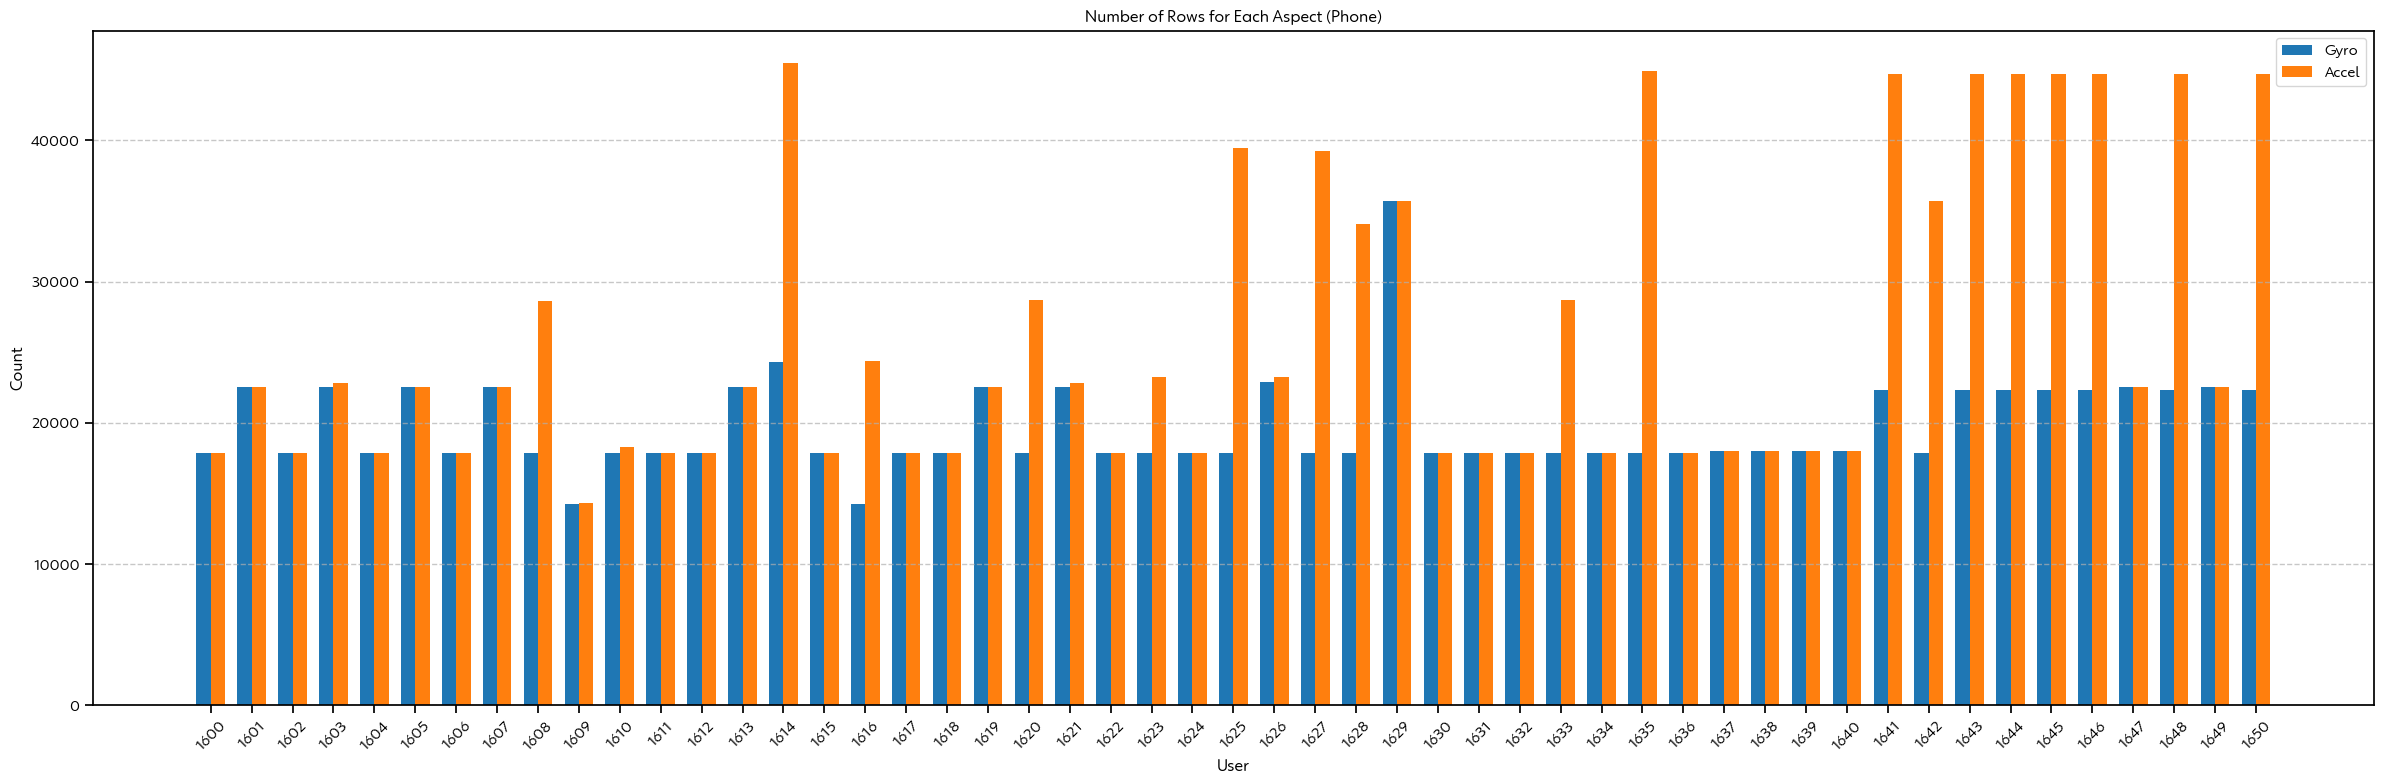

In [25]:
# Get the value counts of the 'activity' column
activity_counts1 = filtered_phonegyr['user'].value_counts()
activity_counts2 = filtered_phoneacc['user'].value_counts()

# Plot a bar chart
all_activities = sorted(set(activity_counts1.index) | set(activity_counts2.index))

# Create bar chart
bar_width = 0.35
index = range(len(all_activities))

plt.figure(figsize=(24, 8))
plt.bar(index, activity_counts1.reindex(all_activities), bar_width, label='Gyro')
plt.bar([i + bar_width for i in index], activity_counts2.reindex(all_activities), bar_width, label='Accel')

plt.title('Number of Rows for Each Aspect (Phone)')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks([i + bar_width/2 for i in index], all_activities, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The bar chart visually contrasts the number of rows, or data points, attributed to each sensor aspect (accelerometer and gyroscope) within the phone dataset. Sensor aspects are displayed along the x-axis, while the count of data points is depicted on the y-axis. The visualization clearly differentiates the two elements by using distinct bar colors for accelerometer and gyroscope data. Notably, the chart highlights a significant difference in data distribution between accelerometer and gyroscope sensors, with accelerometer data overwhelmingly surpassing gyroscope data. This dominance of accelerometer data is apparent throughout the chart, indicating a substantial prevalence of accelerometer measurements compared to gyroscope measurements within the phone dataset. Such insights provide valuable context for further analysis and interpretation of the relative importance and utilization of accelerometer and gyroscope sensors in capturing phone-related data. 
 
***

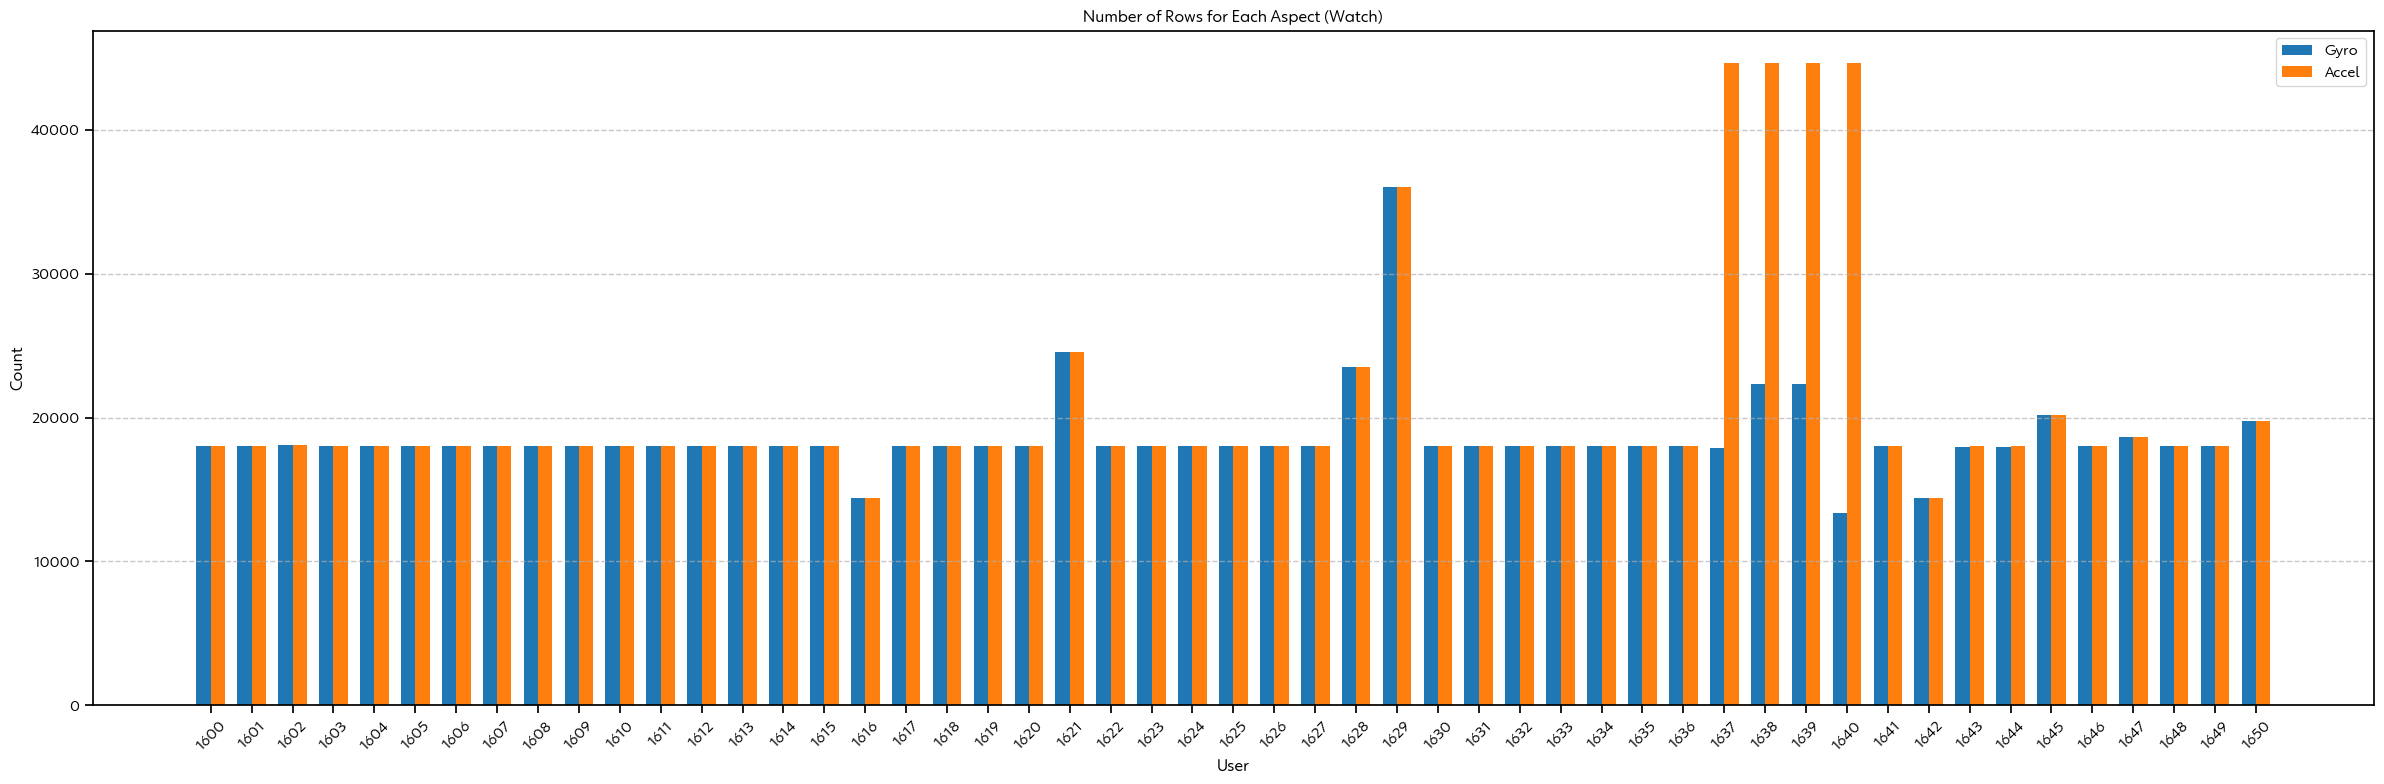

In [26]:
# Get the value counts of the 'activity' column
activity_counts1 = filtered_watchgyr['user'].value_counts()
activity_counts2 = filtered_watchacc['user'].value_counts()

# Plot a bar chart
all_activities = sorted(set(activity_counts1.index) | set(activity_counts2.index))

# Create bar chart
bar_width = 0.35
index = range(len(all_activities))

plt.figure(figsize=(24, 8))
plt.bar(index, activity_counts1.reindex(all_activities), bar_width, label='Gyro')
plt.bar([i + bar_width for i in index], activity_counts2.reindex(all_activities), bar_width, label='Accel')

plt.title('Number of Rows for Each Aspect (Watch)')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks([i + bar_width/2 for i in index], all_activities, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The bar chart offers a comparison of data distribution between the accelerometer and gyroscope sensors for individual users within the watch dataset. Users are listed along the x-axis, while the count of data points is represented on the y-axis. The use of distinct bar colors for accelerometer and gyroscope data facilitates easy differentiation. Overall, the chart reveals similarities in data distribution between the accelerometer and gyroscope. However, notable spikes are evident in user accelerometer data 1637, 1638, 1639, and 1640, where accelerometer counts peak at 40,000, whereas gyroscope counts remain below 35,000. This discrepancy implies divergent usage or activity patterns captured by the accelerometer compared to the gyroscope for these specific users. Such observations offer valuable insights into the dynamics of sensor data collection and user behavior within the context of the watch dataset. 
 
***

<a name="dat_ex"></a>
# Data Exploration of the 5 Chosen Activity
***

In [27]:
words = {
    'A': 'Walking',
    'B': 'Jogging',
    'C': 'Stairs',
    'D': 'Sitting',
    'E': 'Standing'
}

# Replace letters with words in the 'activity' column
filtered_watchacc['activity'] = filtered_watchacc['activity'].replace(words)
filtered_watchgyr['activity'] = filtered_watchgyr['activity'].replace(words)

C:\Users\Ebo\AppData\Local\Temp\ipykernel_7640\2516385517.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_watchacc['activity'] = filtered_watchacc['activity'].replace(words)
C:\Users\Ebo\AppData\Local\Temp\ipykernel_7640\2516385517.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_watchgyr['activity'] = filtered_watchgyr['activity'].replace(words)


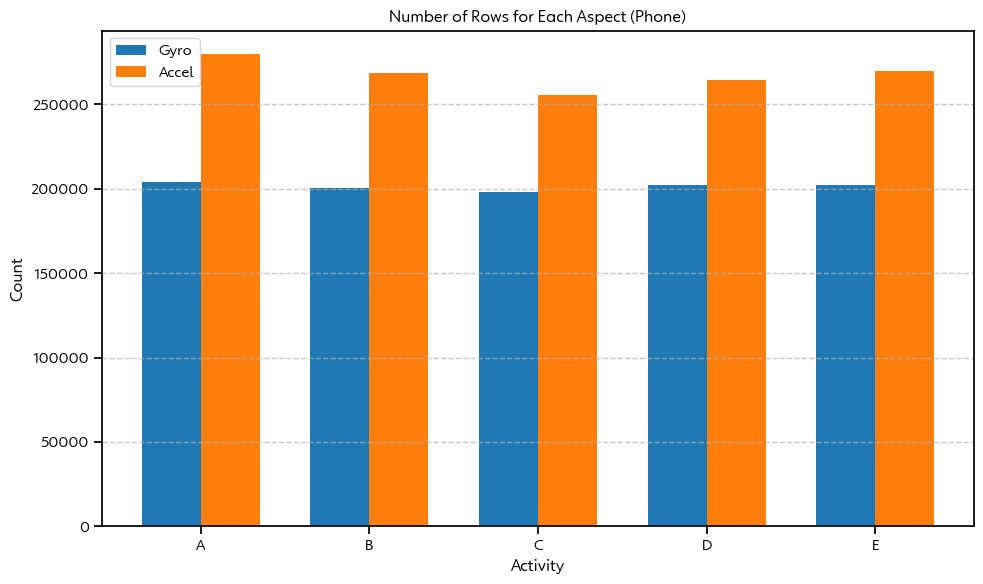

In [28]:
# Get the value counts of the 'activity' column
activity_counts1 = filtered_phonegyr['activity'].value_counts()
activity_counts2 = filtered_phoneacc['activity'].value_counts()

# Plot a bar chart
all_activities = sorted(set(activity_counts1.index) | set(activity_counts2.index))

# Create bar chart
bar_width = 0.35
index = range(len(all_activities))

plt.figure(figsize=(10, 6))
plt.bar(index, activity_counts1.reindex(all_activities), bar_width, label='Gyro')
plt.bar([i + bar_width for i in index], activity_counts2.reindex(all_activities), bar_width, label='Accel')

plt.title('Number of Rows for Each Aspect (Phone)')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks([i + bar_width/2 for i in index], all_activities, rotation=0)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The graph illustrates the number of rows recorded by the phone's gyroscope and accelerometer for various activities. Each activity is categorized and represented along the x-axis, with labels A for walking, B for jogging, C for stairs, D for sitting, and E for standing. The y-axis displays the count of rows per activity. This visualization aids in discerning which activities have been more frequently recorded or possess higher data points. Notably, the chart demonstrates a disparity between the values of accelerometer and gyroscope data. Gyroscope counts exceed 200,000, while accelerometer counts surpass 250,000, indicating a higher frequency of data recorded by the accelerometer across the depicted activities. Such insights provide valuable context for understanding the distribution and prevalence of sensor data for various activities recorded by the phone. 
 
***

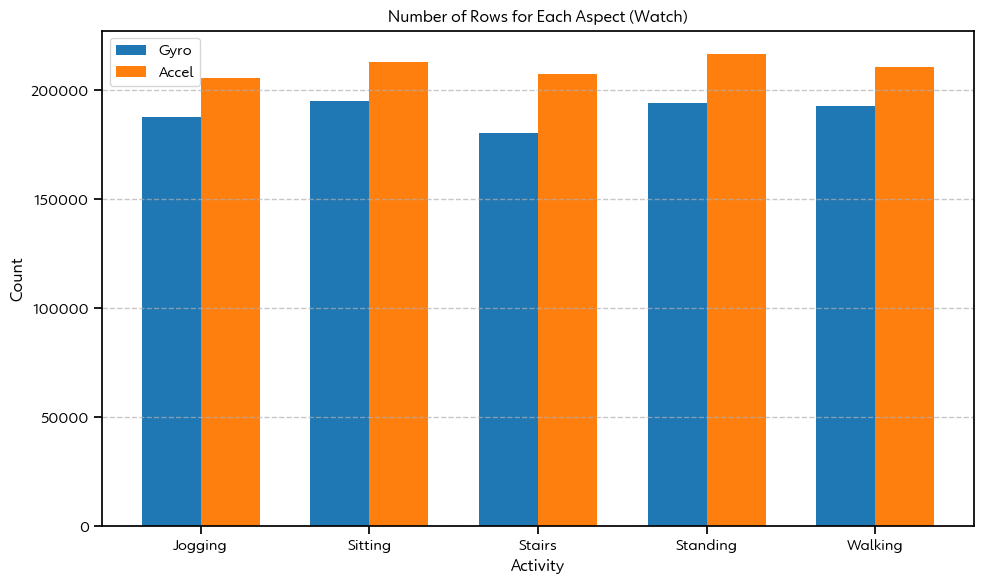

In [29]:
# Get the value counts of the 'activity' column
activity_counts1 = filtered_watchgyr['activity'].value_counts()
activity_counts2 = filtered_watchacc['activity'].value_counts()

# Plot a bar chart
all_activities = sorted(set(activity_counts1.index) | set(activity_counts2.index))

# Create bar chart
bar_width = 0.35
index = range(len(all_activities))

plt.figure(figsize=(10, 6))
plt.bar(index, activity_counts1.reindex(all_activities), bar_width, label='Gyro')
plt.bar([i + bar_width for i in index], activity_counts2.reindex(all_activities), bar_width, label='Accel')

plt.title('Number of Rows for Each Aspect (Watch)')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks([i + bar_width/2 for i in index], all_activities, rotation=0)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

This graph represents the number of rows for each activity recorded by the watch's gyroscope and accelerometer. Activities are categorized, and the count of rows per activity is displayed. This graph is a valuable tool for comparing the frequency and volume of data across different activities recorded by the watch. Notably, the bar chart reveals a minimal disparity between accelerometer and gyroscope values for watch users. While accelerometer counts peak around 200,000, gyroscope counts exceed 150,000, indicating a slight difference in data distribution between the two sensors. Such observations provide insights into the consistency of data collection across activities recorded by the watch's sensors. 
 
***

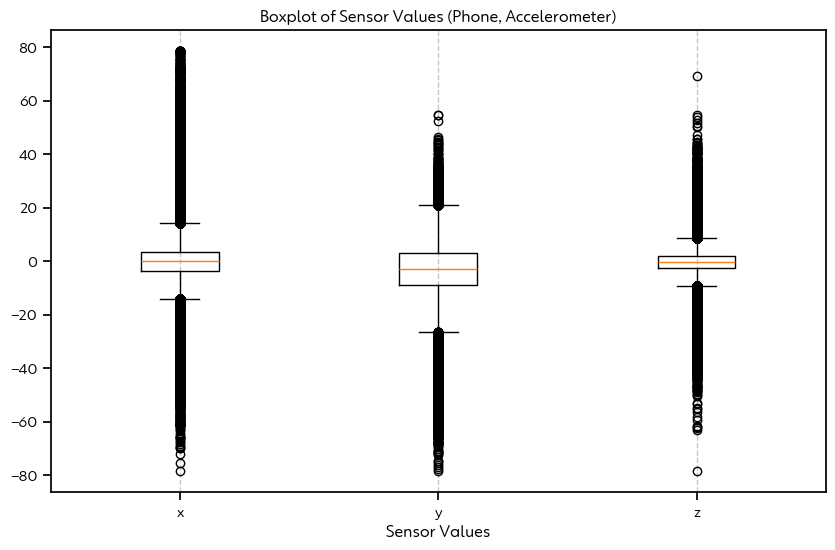

In [30]:
plt.figure(figsize=(10, 6))

# Create a side-by-side boxplot for both datasets
plt.boxplot([filtered_phoneacc['x'], filtered_phoneacc['y'], filtered_phoneacc['z']], vert=True, labels=['x', 'y', 'z'])

plt.title('Boxplot of Sensor Values (Phone, Accelerometer)')
plt.xlabel('Sensor Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Discussion

The phone accelerometer data's boxplot indicates distinct patterns across the x, y, and z axes. It reveals that the y-axis displays a broader distribution of values within the normal range. At the same time, the x and z axes exhibit a denser clustering of data points away from the median, accompanied by a notable presence of outliers beyond the normal range. This suggests that the y-axis values fluctuate more within acceptable limits, reflecting a more comprehensive range of variation within the median. In contrast, the x and z axes demonstrate a higher incidence of extreme values, deviating significantly from the median and indicating more significant variability or irregularity in these dimensions. Such insights gleaned from the boxplot offer a deeper understanding of the distribution and variability of sensor values for the watch accelerometer data, aiding in interpreting its overall characteristics and behaviour. 
 
***

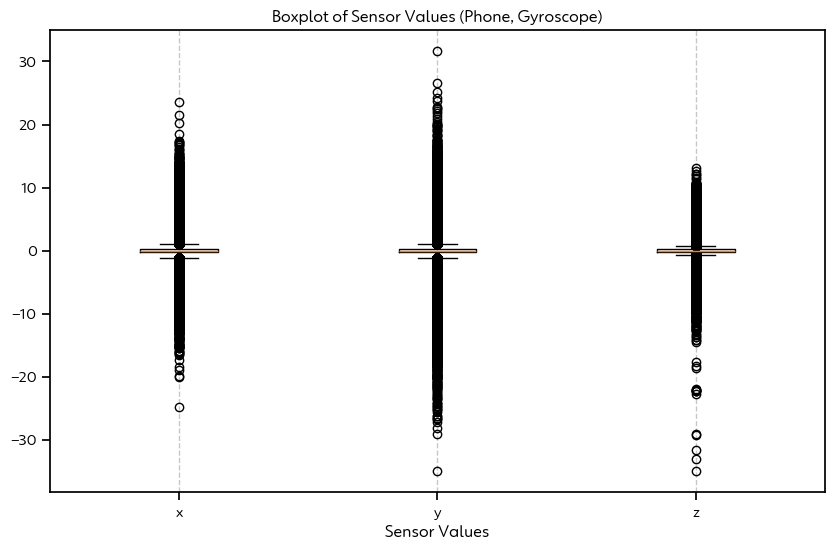

In [31]:
plt.figure(figsize=(10, 6))

# Create a side-by-side boxplot for both datasets
plt.boxplot([filtered_phonegyr['x'], filtered_phonegyr['y'], filtered_phonegyr['z']], vert=True, labels=['x', 'y', 'z'])

plt.title('Boxplot of Sensor Values (Phone, Gyroscope)')
plt.xlabel('Sensor Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Discussion

The boxplot for the watch gyroscope data illustrates that the spread of values across the x, y, and z axes is relatively uniform, indicating a consistent distribution pattern. The boxplot also highlights the presence of outliers, data points that fall significantly outside the typical range of values. These outliers extend the whiskers of the boxplot, showcasing the wider variability present in the gyroscope sensor data. The stiffer spread of values suggests a more constrained distribution, while the broader reach of the outliers signifies a greater degree of variation within the dataset. Overall, this visualization provides valuable insights into the overall distribution and variability of gyroscope sensor data on the watch, aiding in understanding its characteristics and behavior. 
 
***

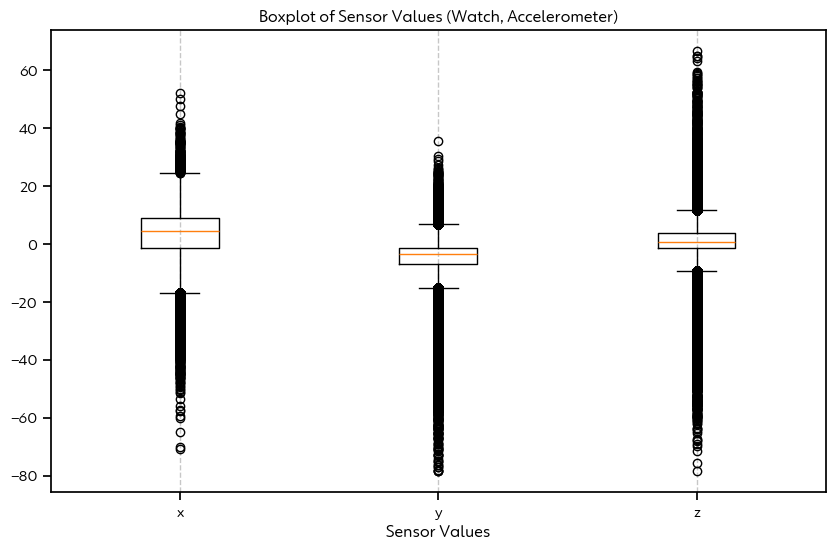

In [32]:
plt.figure(figsize=(10, 6))

# Create a side-by-side boxplot for both datasets
plt.boxplot([filtered_watchacc['x'], filtered_watchacc['y'], filtered_watchacc['z']], vert=True, labels=['x', 'y', 'z'])

plt.title('Boxplot of Sensor Values (Watch, Accelerometer)')
plt.xlabel('Sensor Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Discussion

The boxplot representing the watch accelerometer data offers insights into the distribution and variability of sensor values across the x, y, and z axes. Notably, the median of the x-axis appears higher than that of the y and z axes, suggesting a potential difference in the central tendency of these dimensions. Furthermore, the whiskers of the x-axis exhibit a wider spread compared to the y and z axes, indicating a broader range of values along this dimension. However, it's important to note that the outliers for the y and z axes extend further than those of the x-axis, signifying a broader variation in values for these dimensions despite their narrower spread. This suggests that while the x-axis may have a wider distribution, the y and z axes exhibit more significant variability within the dataset. Overall, this visualization aids in understanding both the overall distribution and the variability of accelerometer sensor data on the watch across different axes. 
 
***

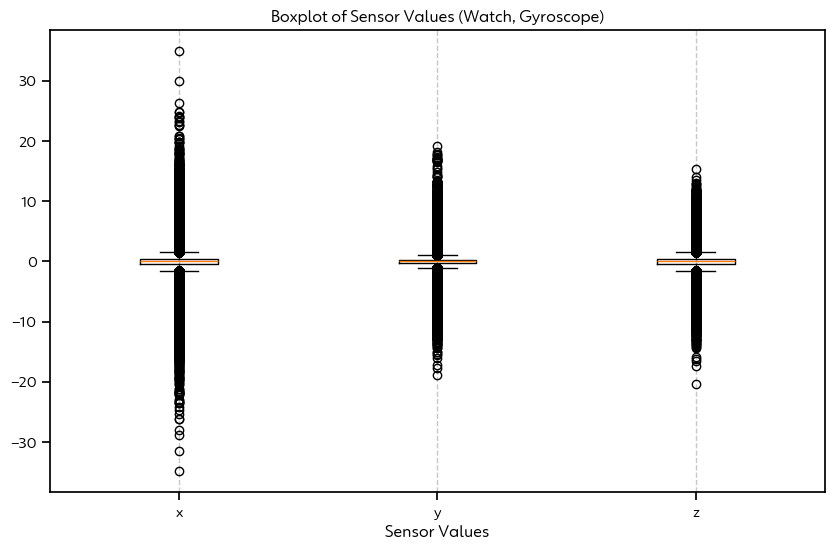

In [33]:
plt.figure(figsize=(10, 6))

# Create a side-by-side boxplot for both datasets
plt.boxplot([filtered_watchgyr['x'], filtered_watchgyr['y'], filtered_watchgyr['z']], vert=True, labels=['x', 'y', 'z'])

plt.title('Boxplot of Sensor Values (Watch, Gyroscope)')
plt.xlabel('Sensor Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Discussion

The boxplot representing the watch gyroscope data offers insights into the distribution and variability of sensor values across the x, y, and z axes. Notably, the interquartile range and whiskers appear stiff, indicating a constrained distribution of values across these dimensions. This suggests that most data points fall within a relatively narrow range. However, the presence of outliers, particularly noticeable for the x-axis, extends the whiskers, indicating a broader value variation for this dimension than the others. Despite the constrained distribution, the presence of outliers highlights the potential for extreme values within the dataset, particularly along the x-axis. Overall, this visualization provides valuable information about the overall distribution and variability of gyroscope sensor data on the watch, aiding in a deeper understanding of its characteristics and behavior. 
 
***

<center> <b> Based on the analysis conducted, it has come to our attention that irregularities exist in the data gathering process concerning smartphones when compared to smartwatches. In addition to these discrepancies, numerous external factors must be taken into consideration when utilizing smartphone datasets. For instance, the given article does not specify the type of bottom clothing worn by individuals. The size of the bottom attire may influence the positioning of the phone within the pocket, thereby potentially impacting the accuracy of results. Consequently, we have opted to utilize the dataset derived from smartwatches due to its perceived reliability and reduced susceptibility to such variables. <b>

<a name="act"></a>
# The 5 Activity Data Discussion
***

In [34]:
# def plot_activity(activity, df):
#     plt.figure(figsize=(24, 4))  # Adjust the figure size as needed
#     data = df[df['activity'] == activity][['x', 'y', 'z']][:500]  # Limit data to first 500 rows for clarity
    
#     plt.plot(data.index, data['x'], color='b', label='X Sensor Values')
#     plt.plot(data.index, data['y'], color='r', label='Y Sensor Values')
#     plt.plot(data.index, data['z'], color='g', label='Z Sensor Values')
    
#     plt.title(activity)
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.legend()
#     plt.grid(True)
    
#     plt.show()
    
# # Example usage
# activities = ['Walking', 'Jogging', 'Stairs', 'Sitting', 'Standing']
# for activity in activities:
#     plot_activity(activity, filtered_watchacc)
    
# # Example usage
# activities = ['Walking', 'Jogging', 'Stairs', 'Sitting', 'Standing']
# for activity in activities:
#     plot_activity(activity, filtered_watchgyr)

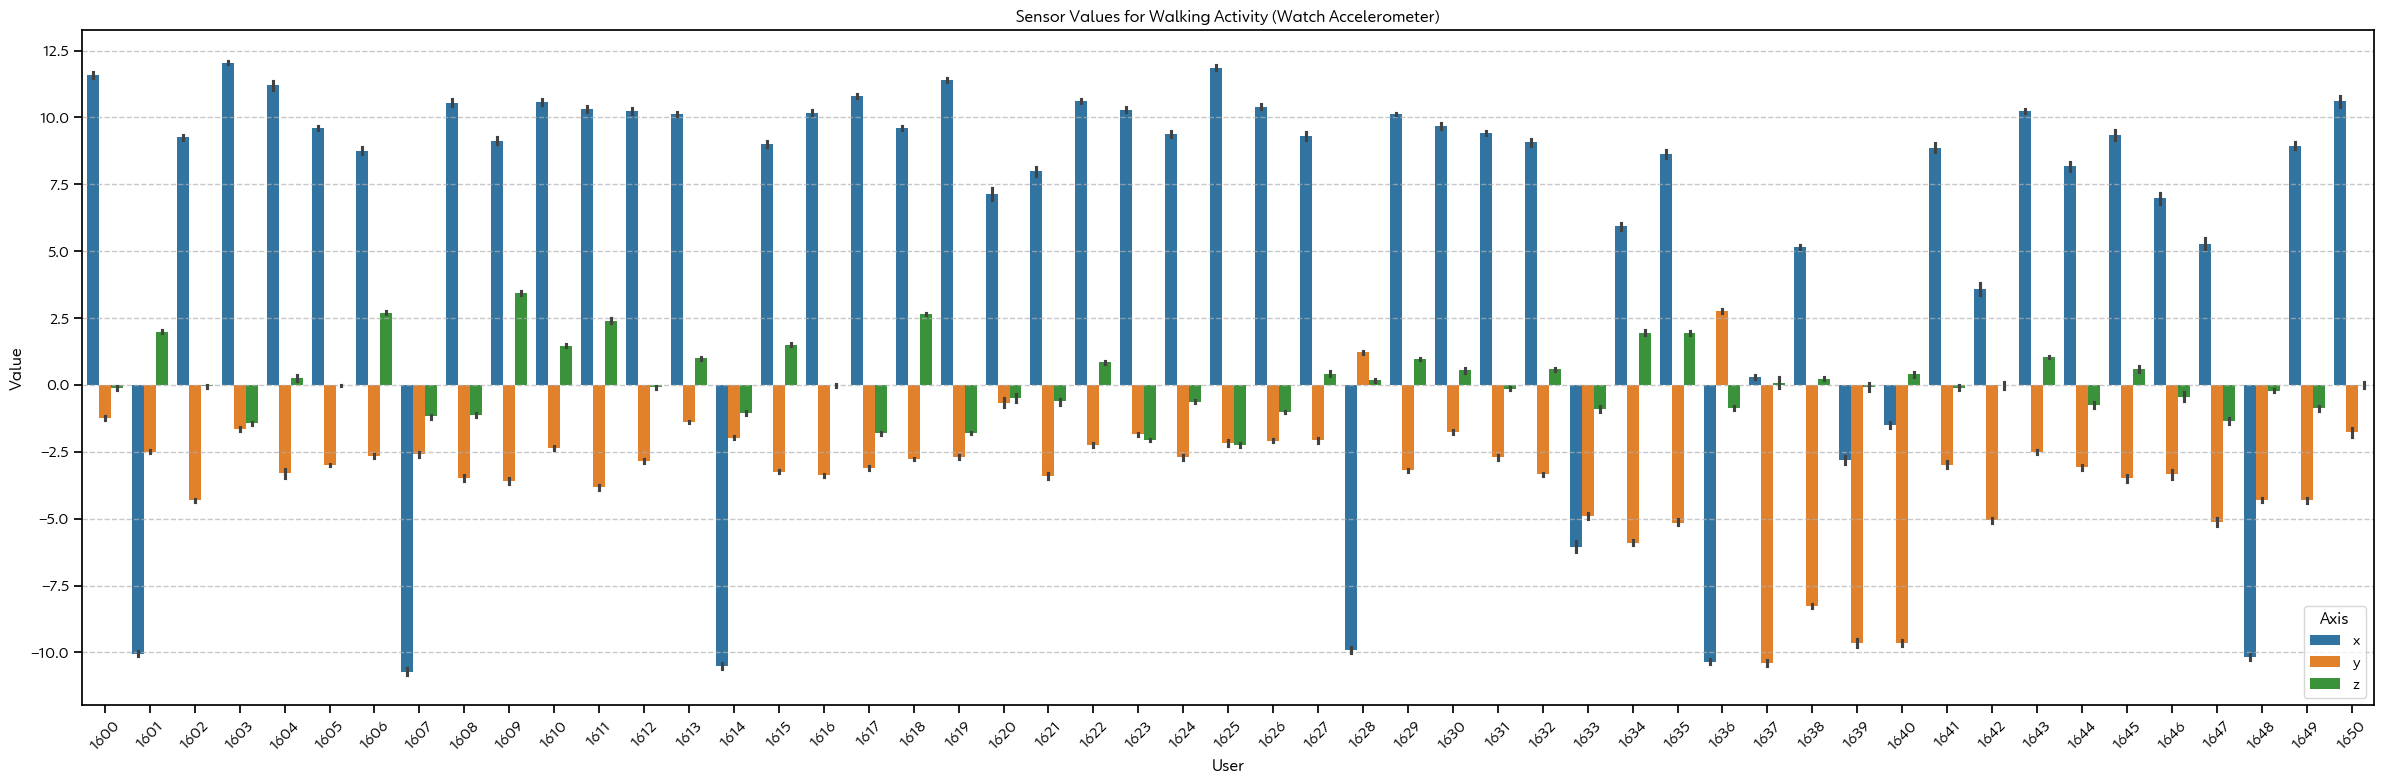

In [35]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchacc[filtered_watchacc['activity'] == 'Walking']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Walking Activity (Watch Accelerometer)')
plt.xlabel('User')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(2.5))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during walking activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). In the graph, the accelerometer or the user’s acceleration is being calculated; the acceleration sensor measures the linear direction of acceleration movement. The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the acceleration movement of activity being employed.  

The x-axis in the legend of the graph signifies the watch’s movement side-to-side or the motion along the vertical axis from left to right. The y-axis represents the movement of up and down that focuses on lifting the device. While the z-axis displays a movement of moving the device closer to the user implying a forward and backward movement.  

In the graph, it can be observed that the evidently higher range of values per user is the blue bars or x axis. There are more positive values of x-axis than negative values. The positive value for x-axis readings during walking activity indicates swinging motion. Higher positive readings may suggest greater moves in that direction. This implies that the users using a watch creates a stronger movement in the opposite direction while walking that impacts the x-axis sensory value. 

The y-axis can be viewed more in the negative values, meaning there is a one direction of movement in the up and down motion. This can be implied that when a user is walking the up and down movement stays in one direction. While the z-axis in the graph can be seen in both negative and positive values. However, there are more positive z-axis values. This indicates that having a more positive z-axis is where the arm's upward motion recovers to a neutral position after swinging forward and backward. 
 
***

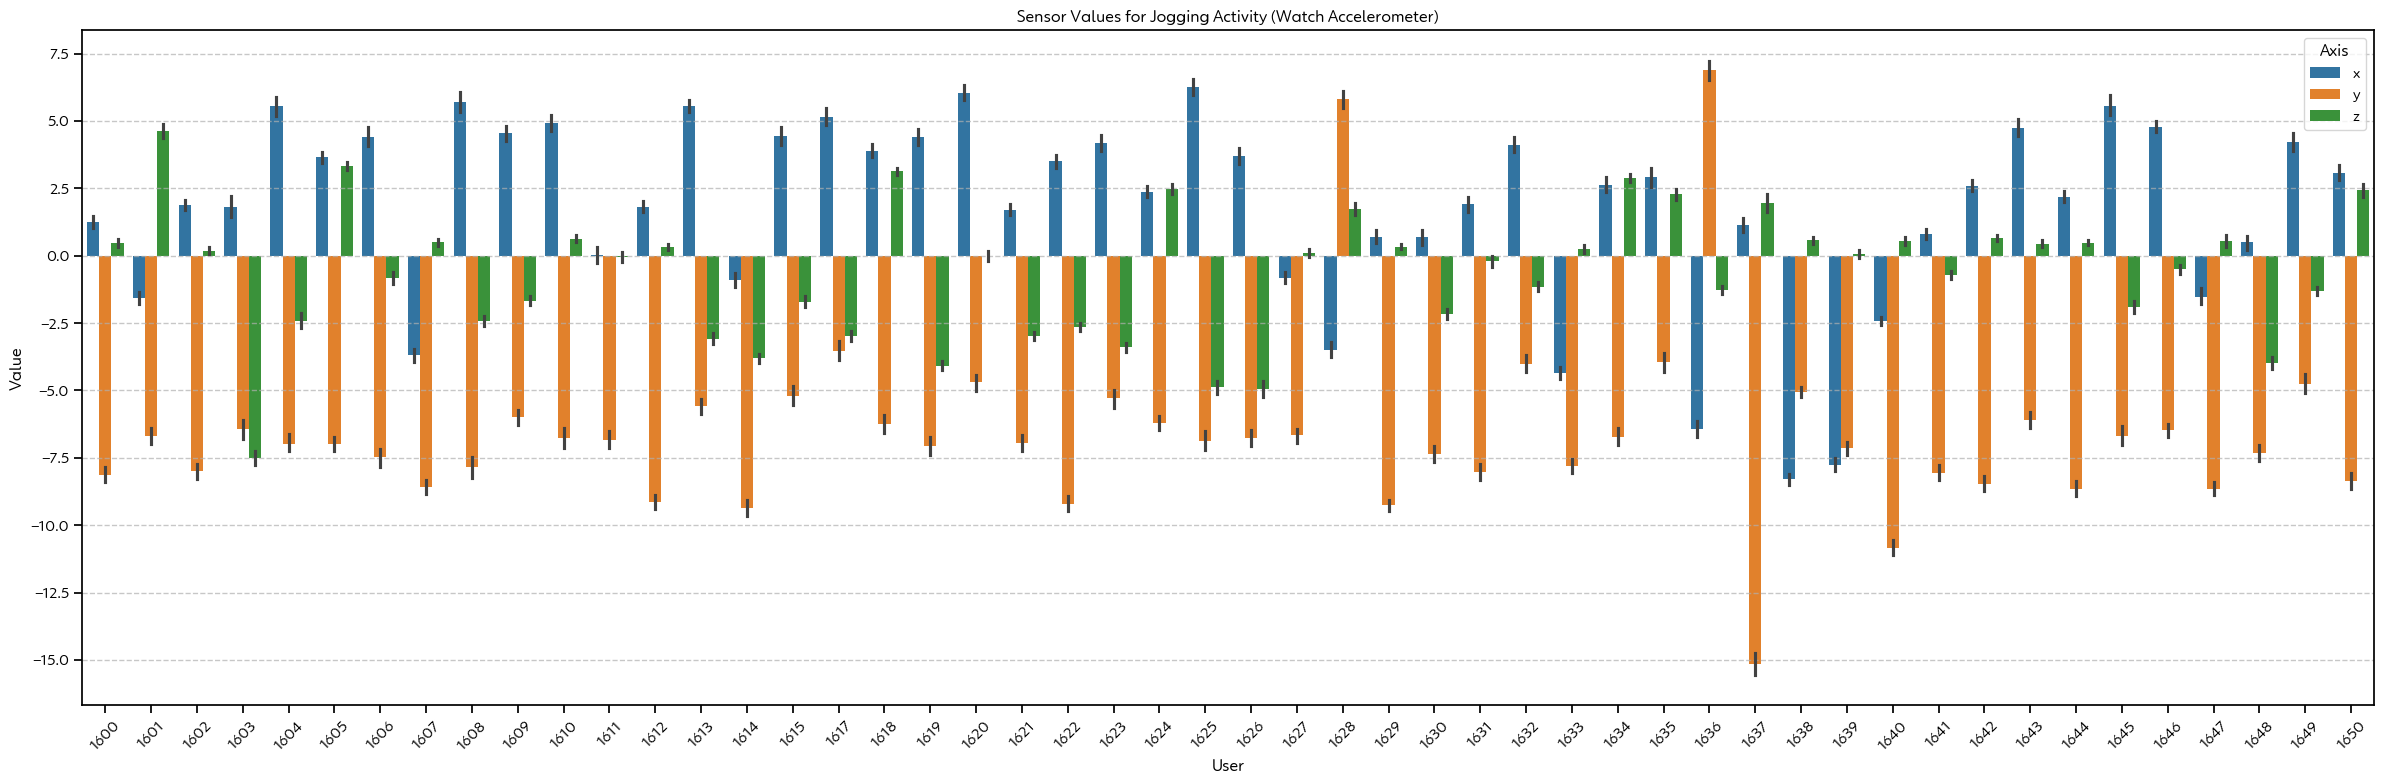

In [36]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchacc[filtered_watchacc['activity'] == 'Jogging']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Jogging Activity (Watch Accelerometer)')
plt.xlabel('User')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(2.5))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during jogging activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the acceleration movement of activity being employed.  
 

In the graph, it can be easily observed that the y-axis has higher negative values. Once your arm travels upward, it opposes gravity, causing the watch to accelerate downhill along the y-axis that results in negative values. The x-axis and the z-axis show small to minimal sensory values. This indicates that during jogging the watch detects more motion in the vertical axis than the side-to-side and forward-backward movements. With the motion of jogging that has mostly vertical displacement, it implies that the user is constantly lifting the arms with the watch device on. 
 
***

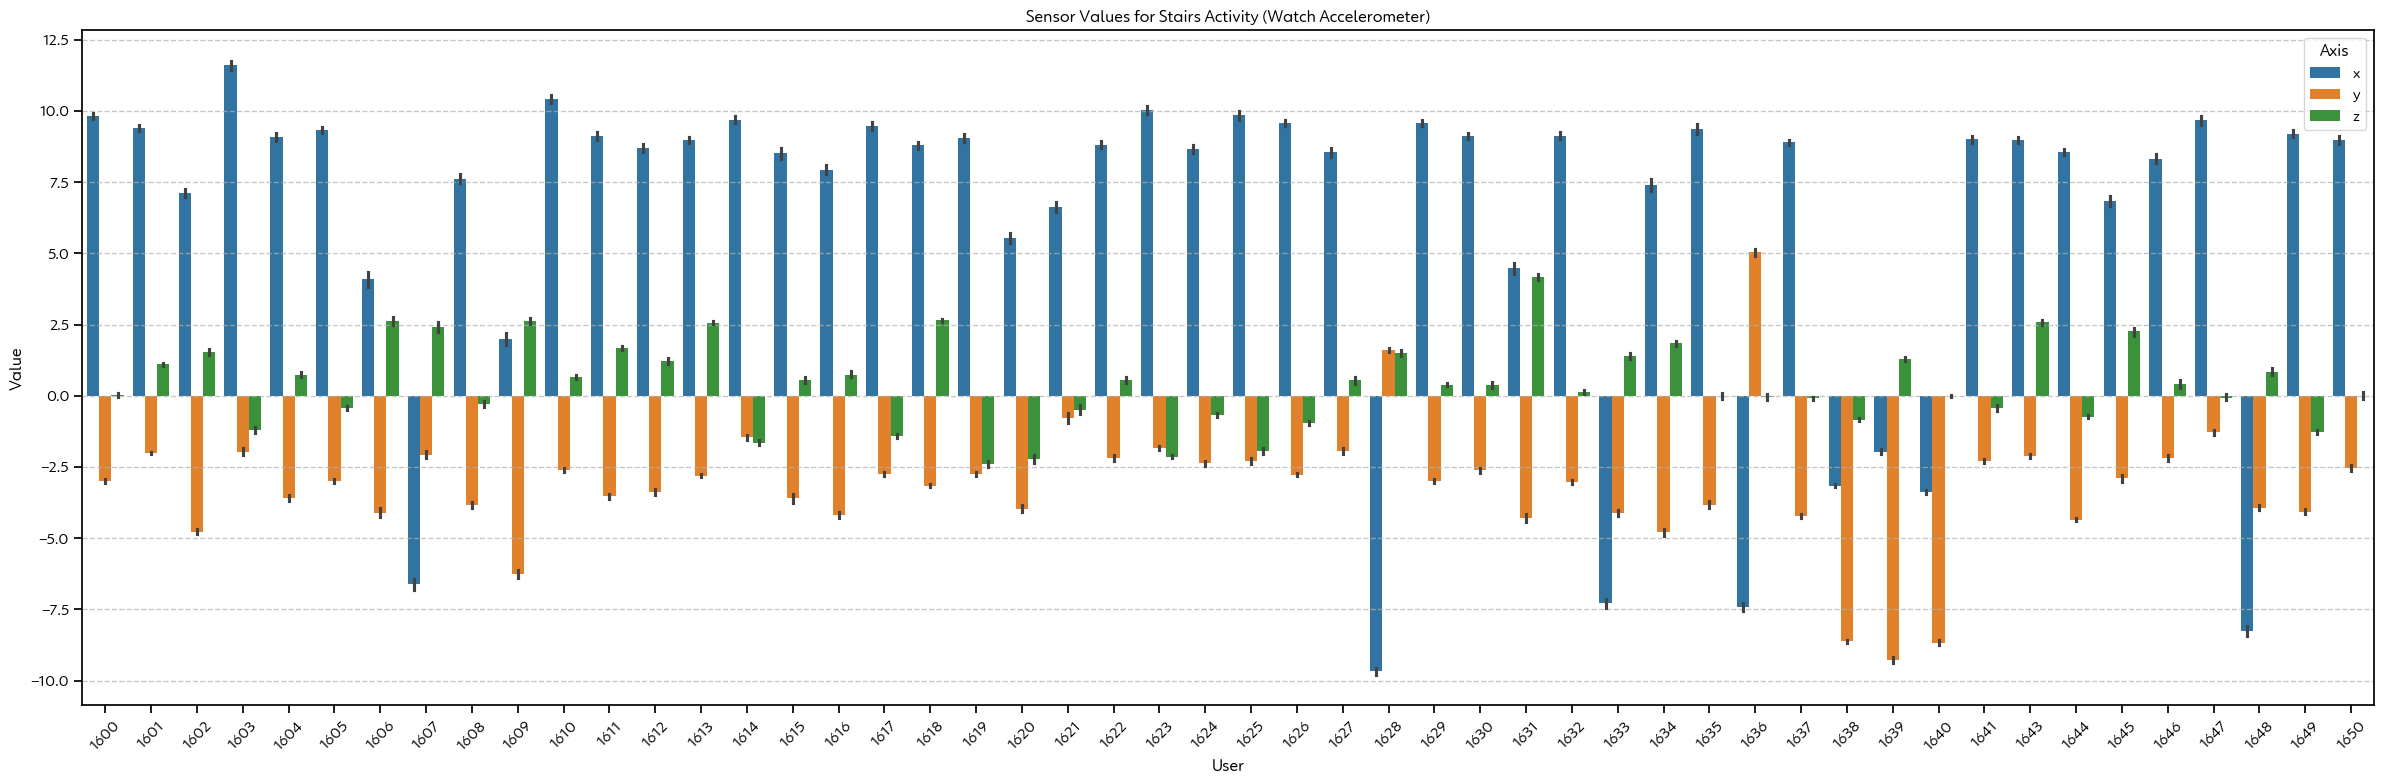

In [37]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchacc[filtered_watchacc['activity'] == 'Stairs']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Stairs Activity (Watch Accelerometer)')
plt.xlabel('User')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(2.5))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during stairs activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the acceleration movement of activity being employed.  

In the graph, it is evident that the x-axis has higher positive values than the y and z axis. Since the x-axis of the watch’s acceleration is positive during a stair activity, the watch implies that it is measuring or sensing the direction of the hand movement proportionate or corresponding to the x-axis. It simply means that with the higher positive values, it detects the upward movement as the user climbs. This could suggest that the stairs are more profound on going up stairs than going downstairs.  
 
***

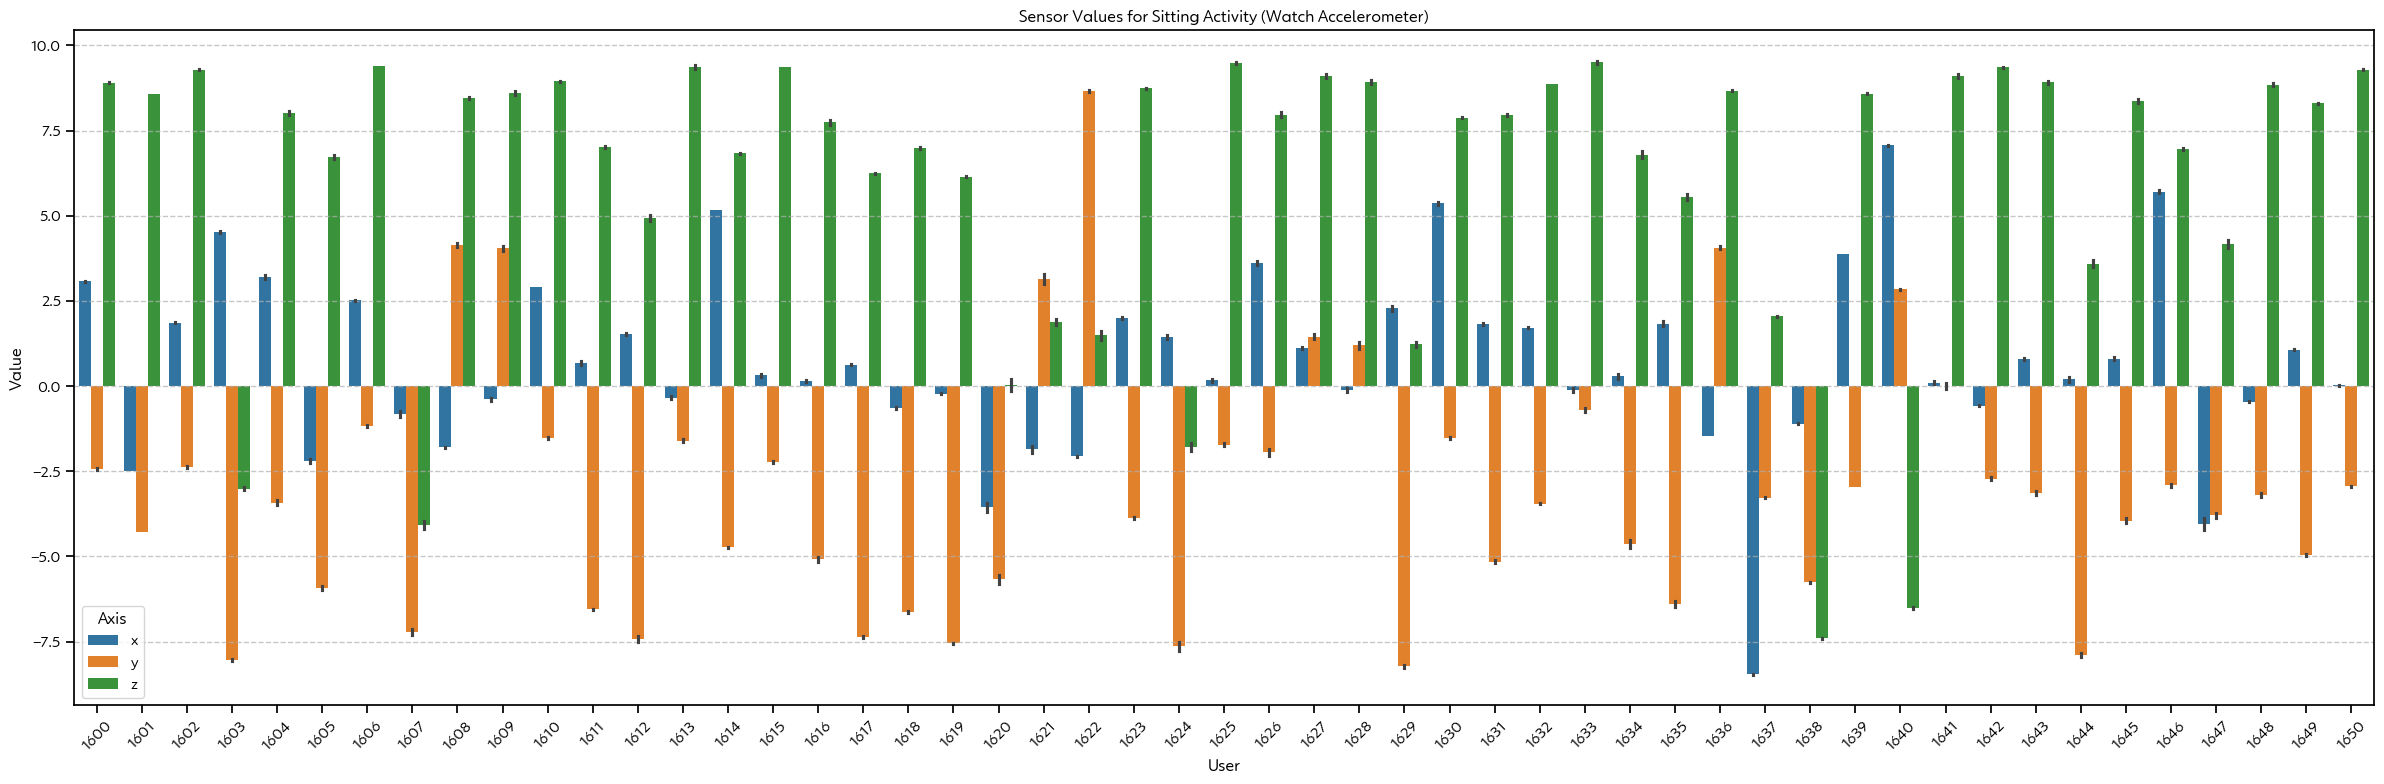

In [38]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchacc[filtered_watchacc['activity'] == 'Sitting']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Sitting Activity (Watch Accelerometer)')
plt.xlabel('User')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(2.5))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during a sitting activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the acceleration movement of activity being employed.  

Unlike other previous graphs, the graph for sitting activity has a less x-axis sensory value. The graph shows that the y-axis has more values in the negative trajectory. This indicates the watch's detection is relatively downward. This orientation highly correlates to how a person or a user usually sits. Since the motion of sitting regards going down from standing to sitting, where the arm rests downward, the y-axis values are more inclined to negative sensory value. 

The z-axis tends towards higher positive sensory values. A positive z-axis reading during a seated activity indicates that the watch detects forward motion. This could suggest that the actions while sitting can have a lifting or adjusting of hand.  
 
***

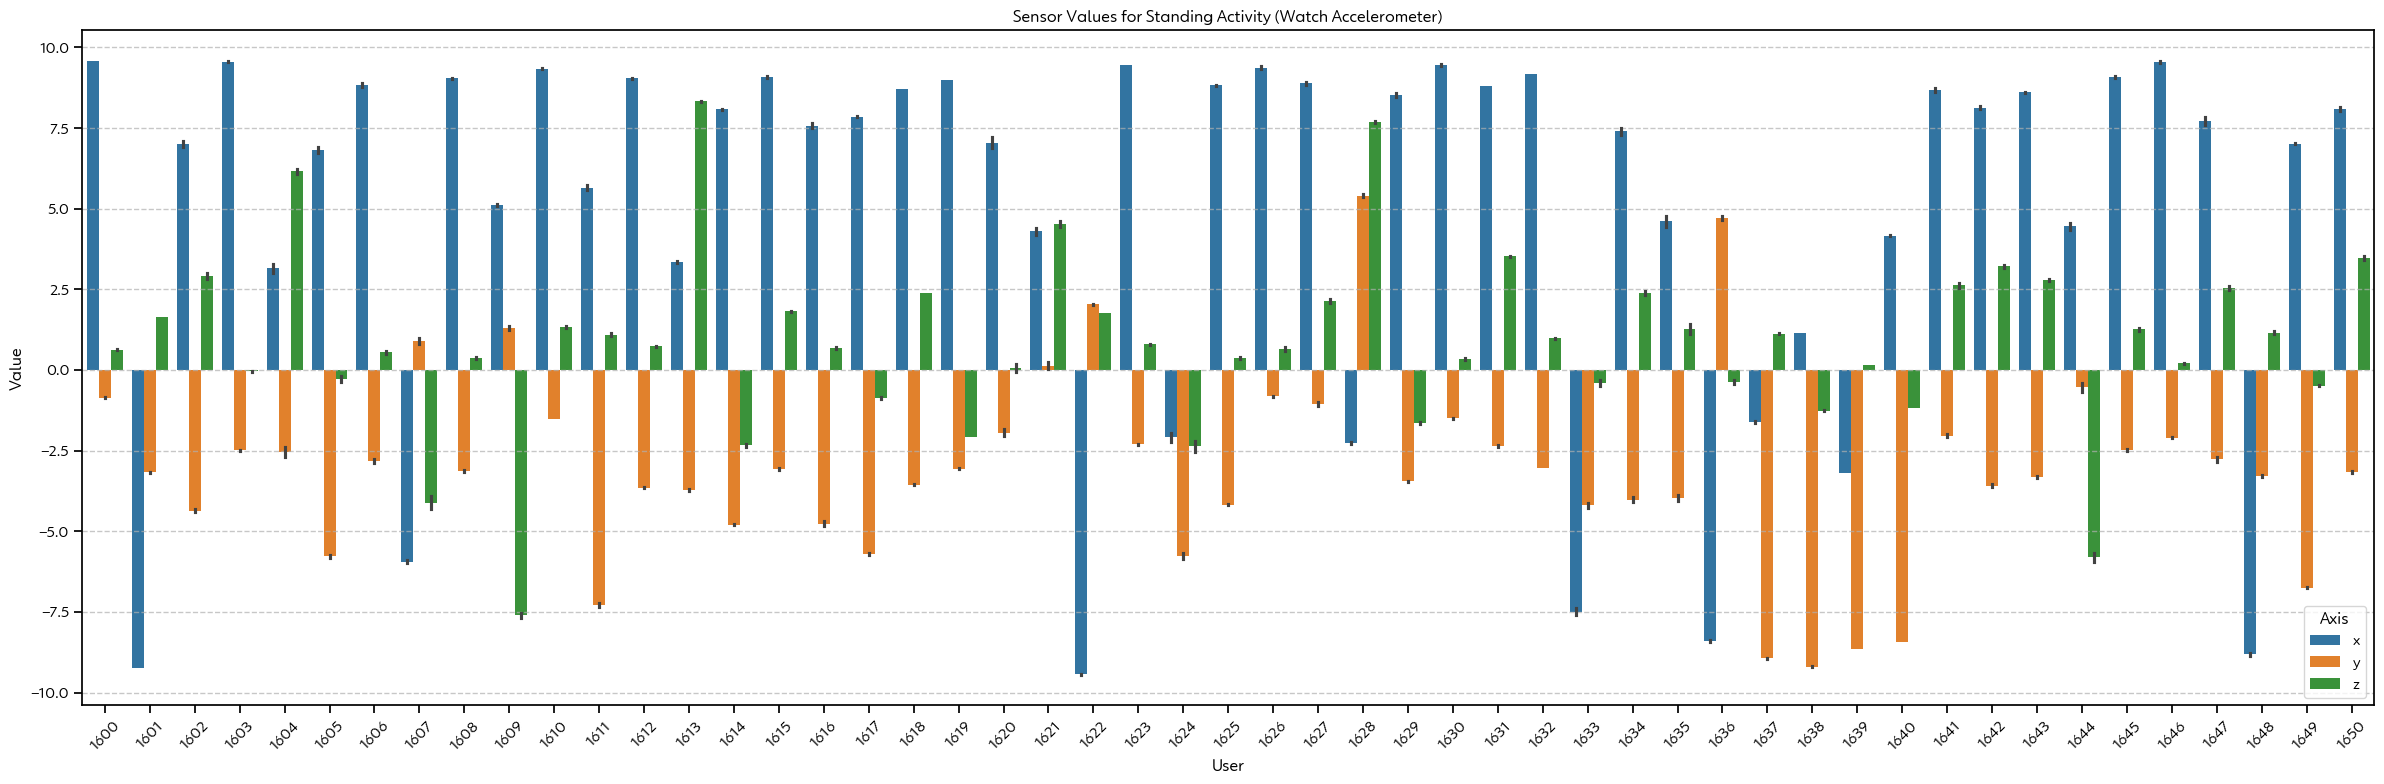

In [39]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchacc[filtered_watchacc['activity'] == 'Standing']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Standing Activity (Watch Accelerometer)')
plt.xlabel('User')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(2.5))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during a standing activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the acceleration movement of activity being employed.  

The displayed graph shows that the x and z axis inclined to higher positive values than the y-axis with negative sensory values. Since the user is acting in a standing position, the likelihood of the hand or arm moving up and down is very minimal. The x and z axis shows that the watch detects the direction of which a certain movement is happening when standing. There is an ongoing movement of which the user is moving its hand forward or back or swinging its hand. This could imply that the user is doing some activity like using the phone, smoking, or just standing.  
 
***

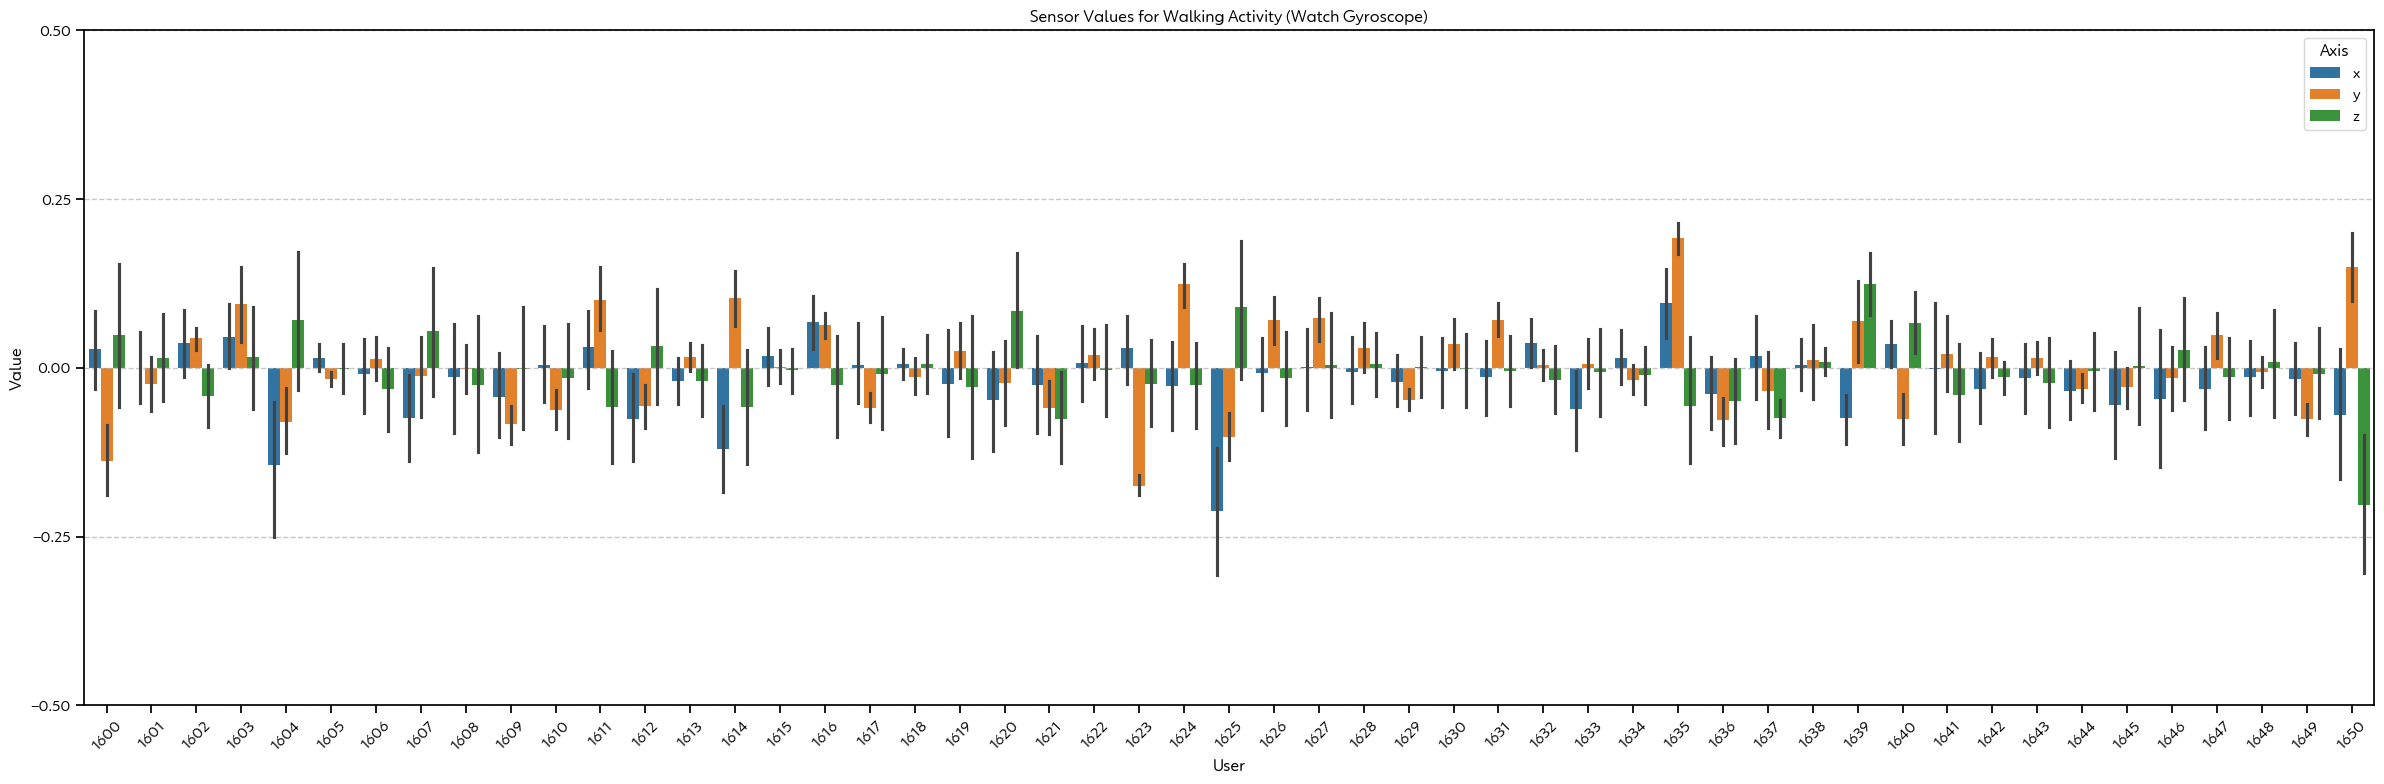

In [40]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchgyr[filtered_watchgyr['activity'] == 'Walking']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Walking Activity (Watch Gyroscope)')
plt.xlabel('User')
plt.ylabel('Value')
plt.ylim(-0.5, 0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(0.25))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during walking activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). In the graph, the gyroscope or the user’s gyroscope is being calculated; the gyroscope sensor measures the angular velocity orientation movement. The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the gyroscope movement of activity being employed.  

The x-axis in the legend of the graph signifies the watch’s movement side-to-side or the motion along the vertical axis from left to right. The y-axis represents the movement of up and down that focuses on lifting the device. While the z-axis displays a movement of moving the device closer to the user implying a forward and backward movement. The values shown in the gyroscope sensor have an appearance of a small indication because it rates the rotation or angularity of the velocity. With a little value count, it only means that the device is not rotating rapidly.  

In the shown graph, the y-axis sensor value of a gyroscope in a watch is more visible and has a higher positive value during a walking activity. This implies that there is a crucial or more movement in an up and down motion or rotation within the vertical plane. Since walking is a recurrent sequence of lifting one foot off the floor then going back to lowering down, it is highly obvious that vertical orientation is arising in the watch gyroscope walking activity. Additionally, as viewed in the graph, there may be small movement along the x-axis and z-axis, however they are usually less noticeable because walking is primarily vertical with little forward and backward orientation.  
 
***

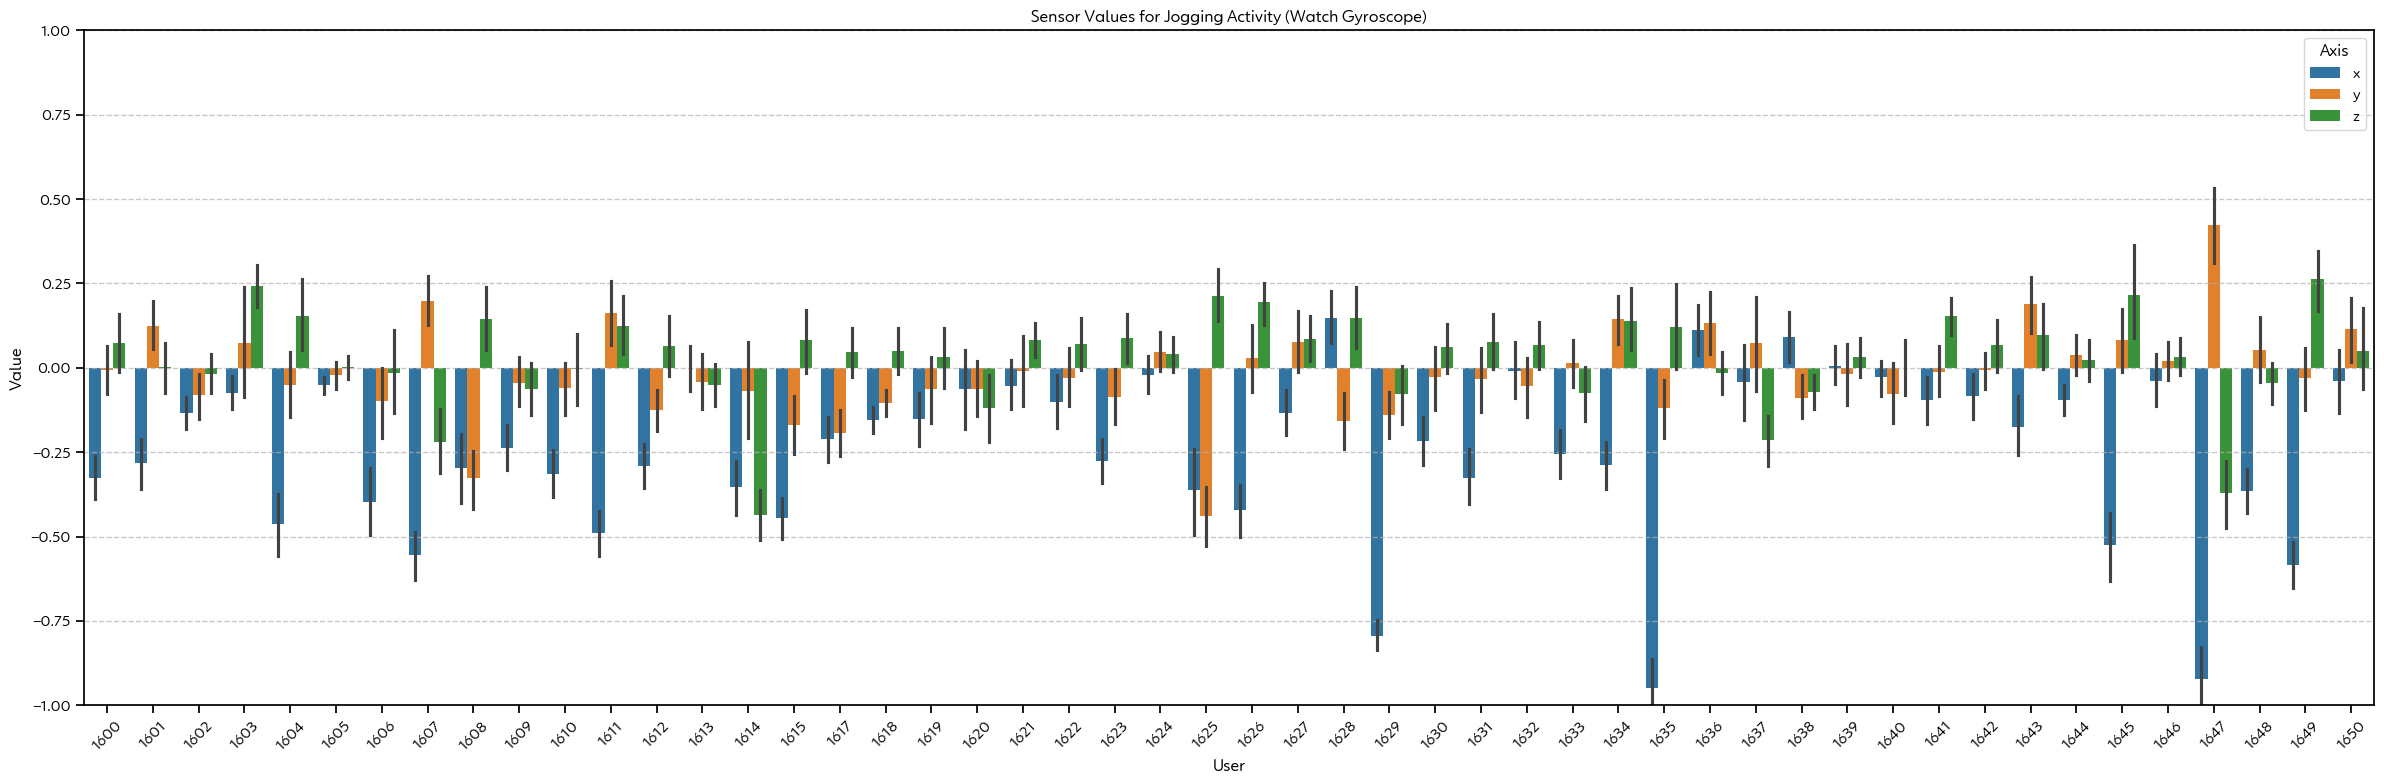

In [41]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchgyr[filtered_watchgyr['activity'] == 'Jogging']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Jogging Activity (Watch Gyroscope)')
plt.xlabel('User')
plt.ylabel('Value')
plt.ylim(-1, 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(0.25))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during walking activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). In the graph, the gyroscope or the user’s gyroscope is being calculated; the gyroscope sensor measures the angular velocity orientation movement. The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the gyroscope movement of activity being employed.  

The graph shows that there are more axis values in the negative sensory region. A negative number on any axis implies that it is moving or rotating in the opposite direction. Since the users are jogging, their orientation of the arm becomes more dynamic and involves rotations in multiple directions. Due to the jogging motion, the axis of sensation has a different motion contributing to more negative sensory value.  
 
***

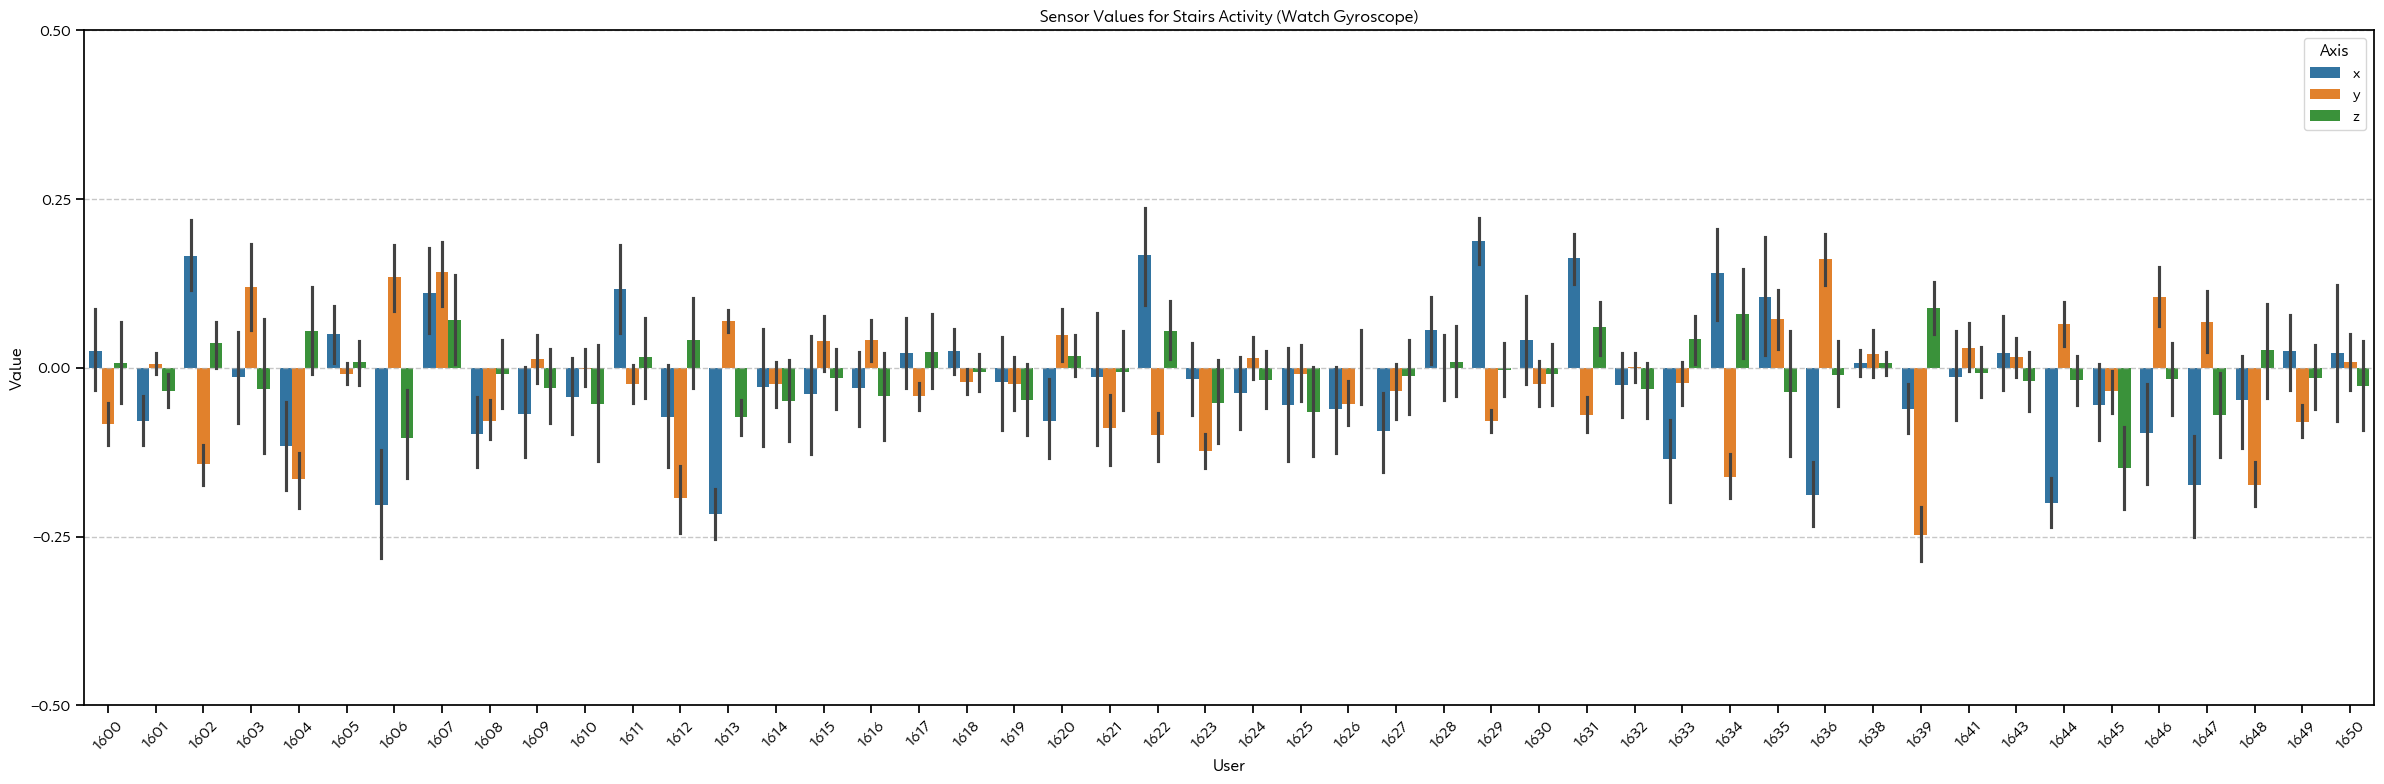

In [42]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchgyr[filtered_watchgyr['activity'] == 'Stairs']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Stairs Activity (Watch Gyroscope)')
plt.xlabel('User')
plt.ylabel('Value')
plt.ylim(-0.5, 0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(0.25))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during walking activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). In the graph, the gyroscope or the user’s gyroscope is being calculated; the gyroscope sensor measures the angular velocity orientation movement. The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the gyroscope movement of activity being employed.  

The given graph has a mixture of the different axes, but it has a more inclination to negative sensory values. This implies that with the user’s watch device, it detects variation of orientation or rotation of motion as they take a step in the stairs. Varying movement of rotation includes downward tilting, minor shifts, or uphill and downhill motion. It can be slightly observed that the orange bar is more evident than the other axis. Hence, the y-axis of a watch’ gyroscope is more sensible in vertical rotation that points upward from taking the stairs in an upward direction.  
 
***

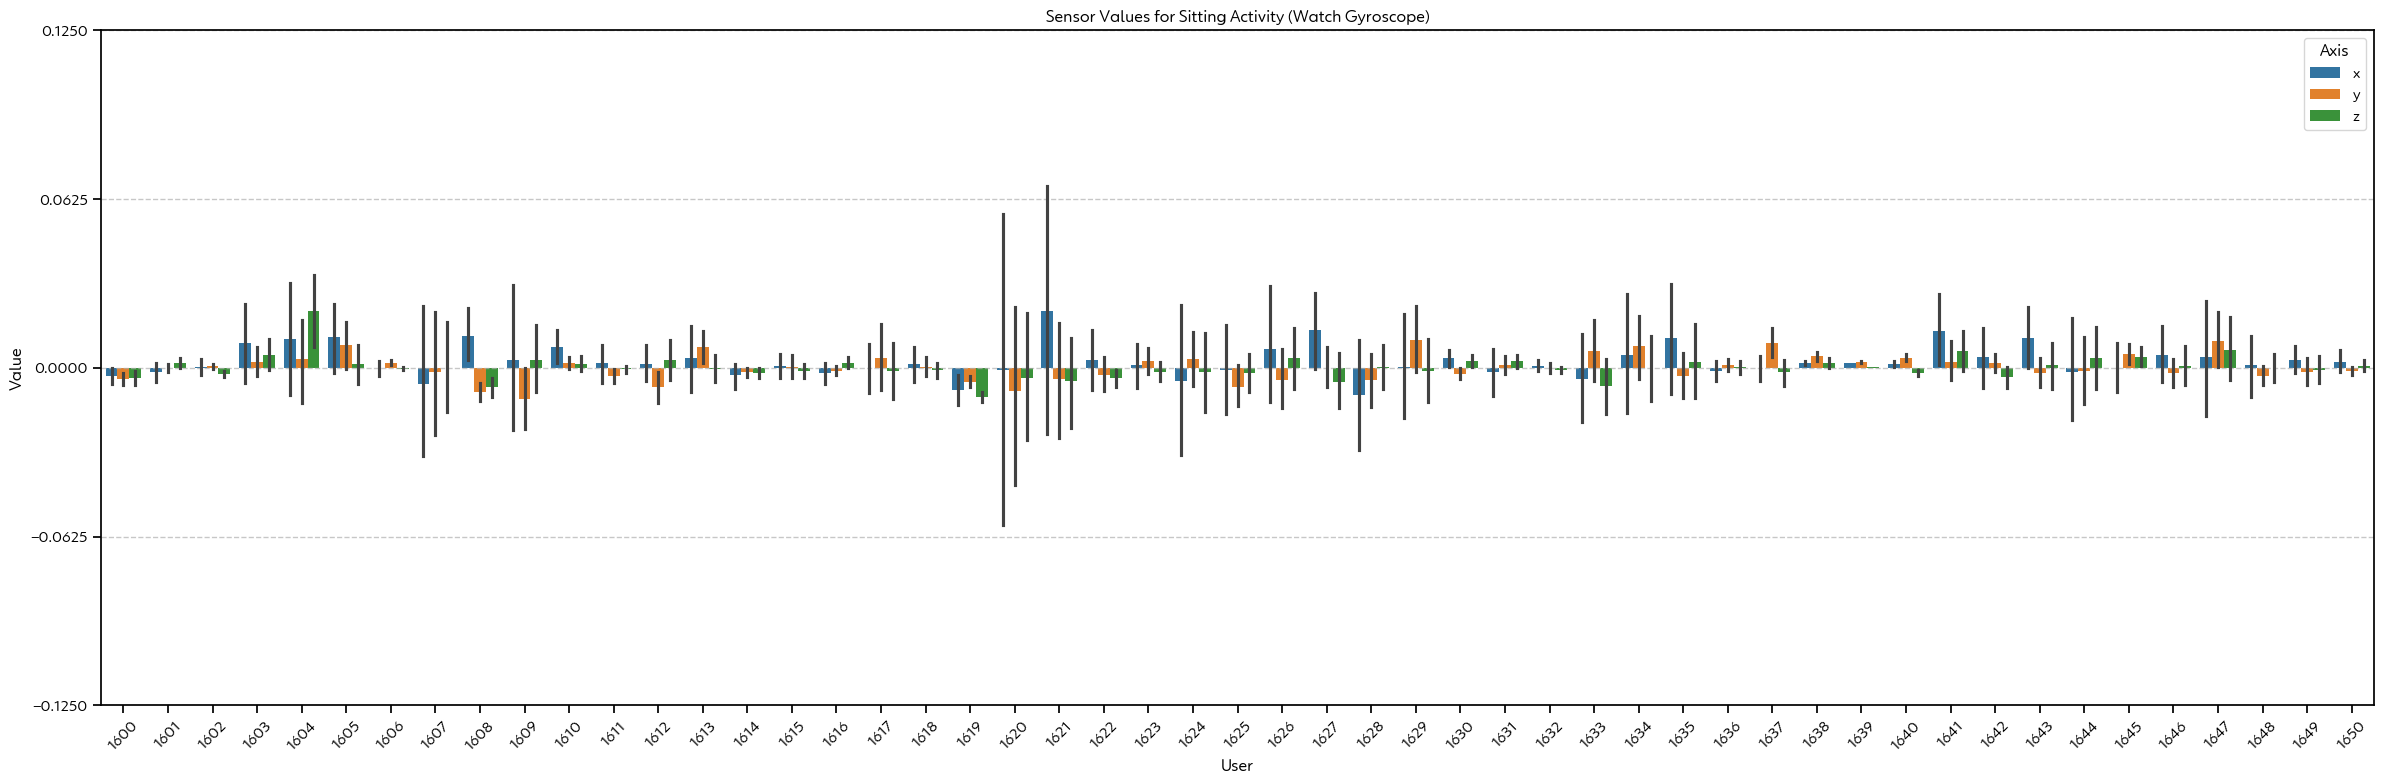

In [43]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchgyr[filtered_watchgyr['activity'] == 'Sitting']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Sitting Activity (Watch Gyroscope)')
plt.xlabel('User')
plt.ylabel('Value')
plt.ylim(-0.125, 0.125)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(0.0625))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during walking activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). In the graph, the gyroscope or the user’s gyroscope is being calculated; the gyroscope sensor measures the angular velocity orientation movement. The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the gyroscope movement of activity being employed.  

Looking at the graph, it has a minimal to very minor specification of axis. The graph displays a very tiny sensor value during a seated activity which indicates that when a user is sitting the likelihood of rotation orientation is very little or limited, arising to a minor display of axis and a very small sensory value. This could suggest that when a user is sitting it imposes a relaxed arm movement that does not trigger a major sensor axis.  
 
***

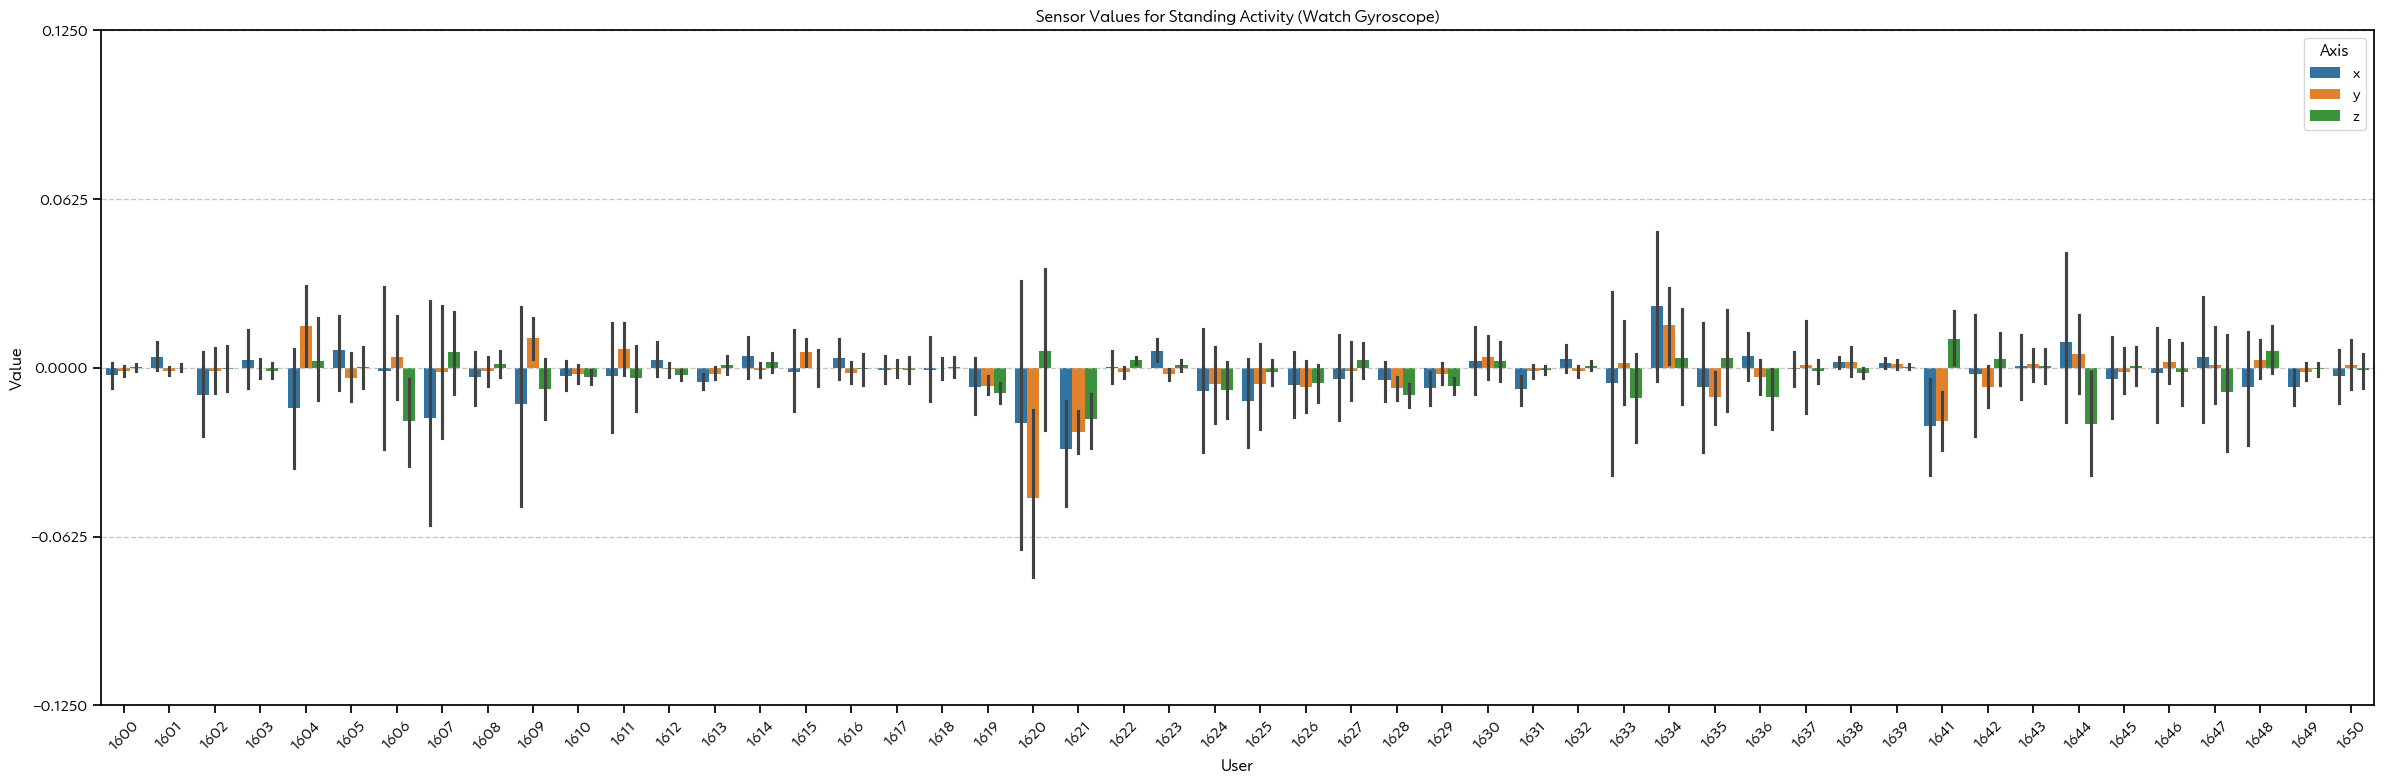

In [44]:
# Filter the DataFrame for the specific activity ('walking')
walking_data = filtered_watchgyr[filtered_watchgyr['activity'] == 'Standing']

# Melt the DataFrame to create a long-form DataFrame suitable for seaborn
melted_df = walking_data.melt(id_vars=['user'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='value')

# Create bar plot using seaborn
plt.figure(figsize=(24, 8))
ax = sns.barplot(data=melted_df, x='user', y='value', hue='axis')
plt.title('Sensor Values for Standing Activity (Watch Gyroscope)')
plt.xlabel('User')
plt.ylabel('Value')
plt.ylim(-0.125, 0.125)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.yaxis.set_major_locator(MultipleLocator(0.0625))

plt.legend(title='Axis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Discussion

The illustrated graph displays a visual representation of sensor values acquired during walking activity for several different users that emphasizes the comparison of the three sensor readings (x, y, and z axis). In the graph, the gyroscope or the user’s gyroscope is being calculated; the gyroscope sensor measures the angular velocity orientation movement. The x-axis represents the users admitted in the dataset, while the y-axis is the values associated with the gyroscope movement of activity being employed.  

Like the graph of “Sensor Values for Sitting Activity (Watch Gyroscope)”, the shown graph also employs a minor specification of axis. When the user is standing, the likelihood of its movement is minimal. Hence, the corresponding gyroscope stabilizes too little to no movement along the axis. This does not suggest that there is no underlying motion detection, but it only implies that the detected sensory is not significant enough to have different changes in orientation to be shown in the graph illustration.  
 
***

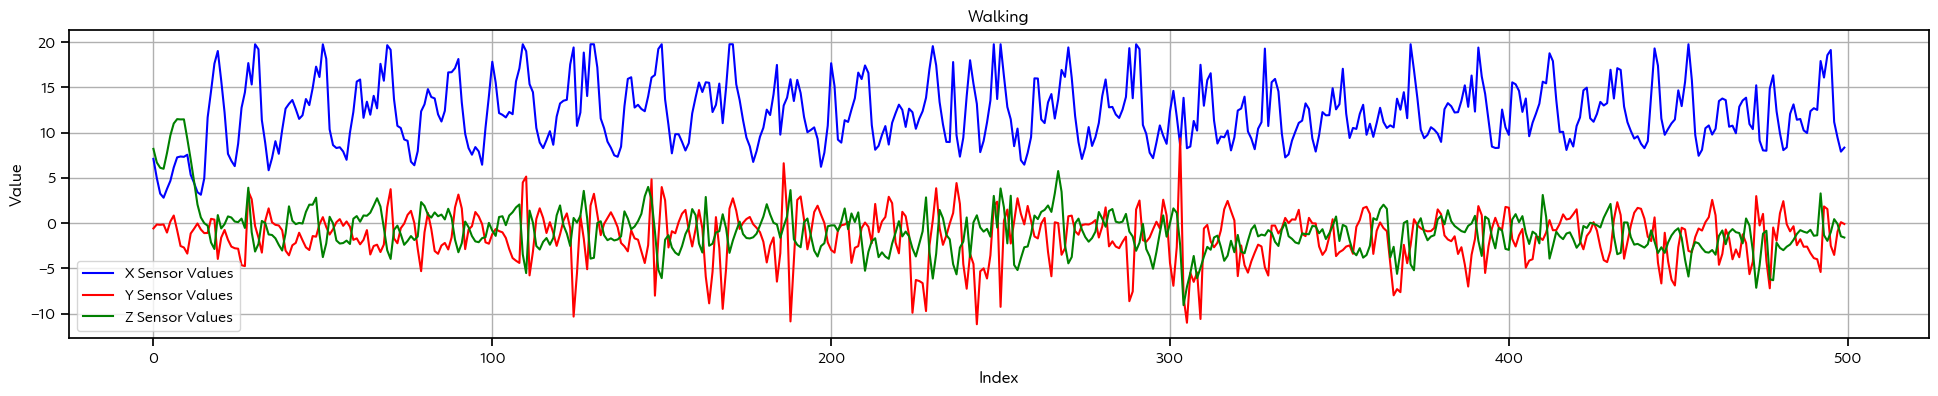

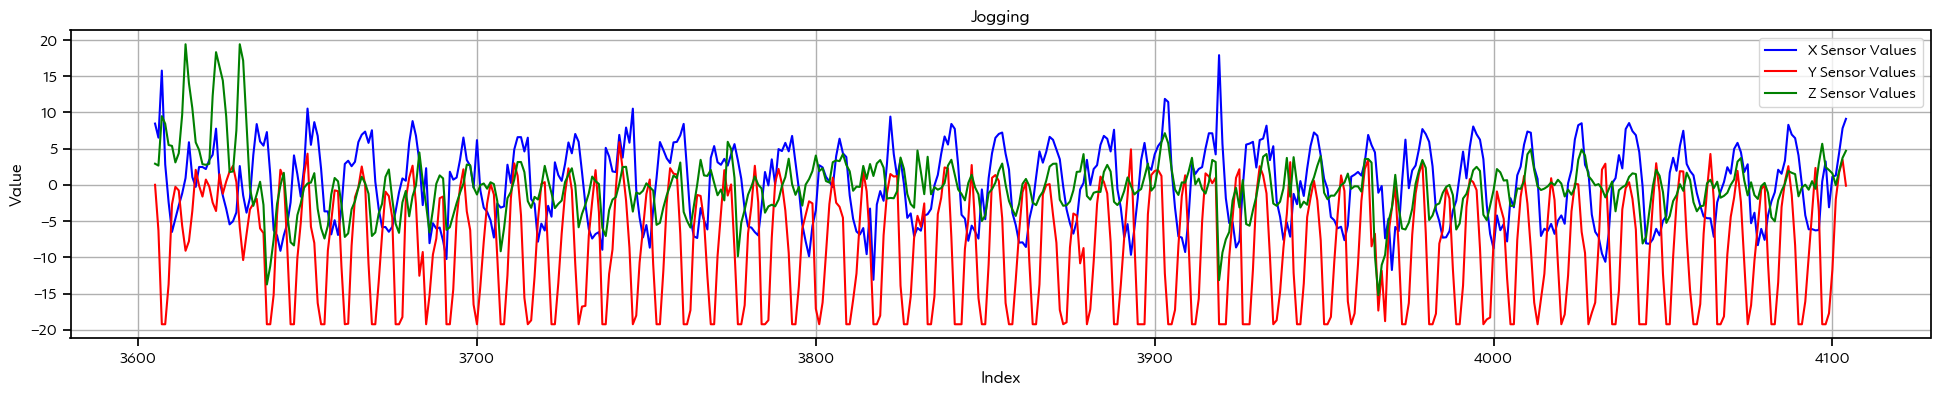

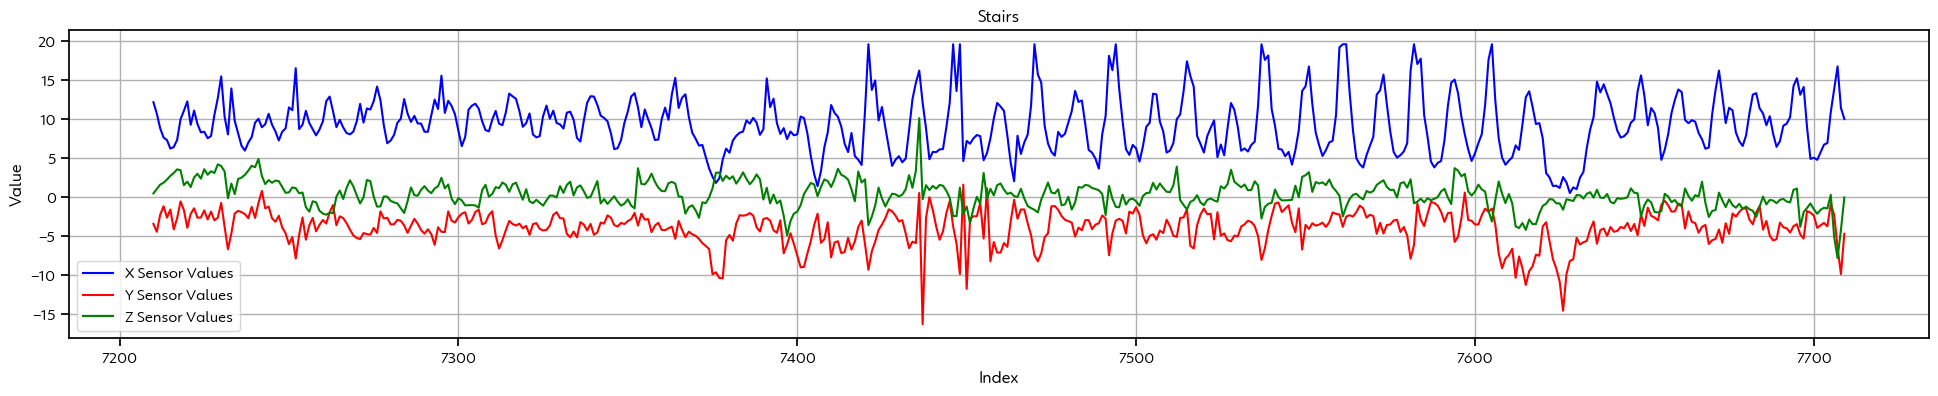

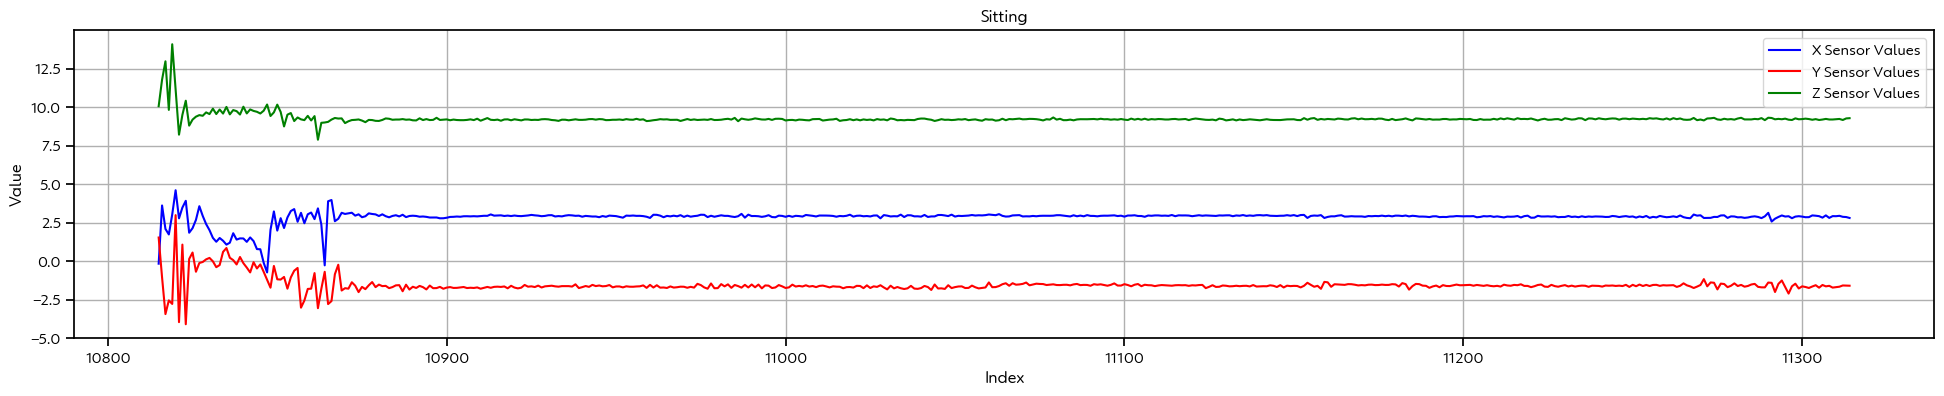

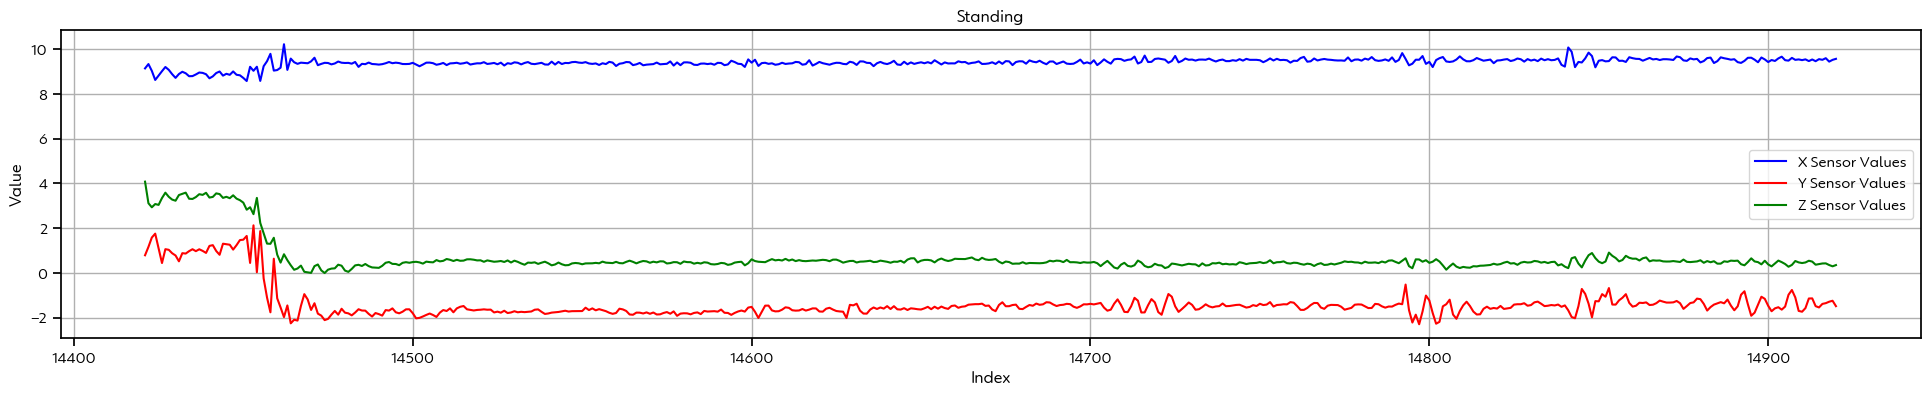

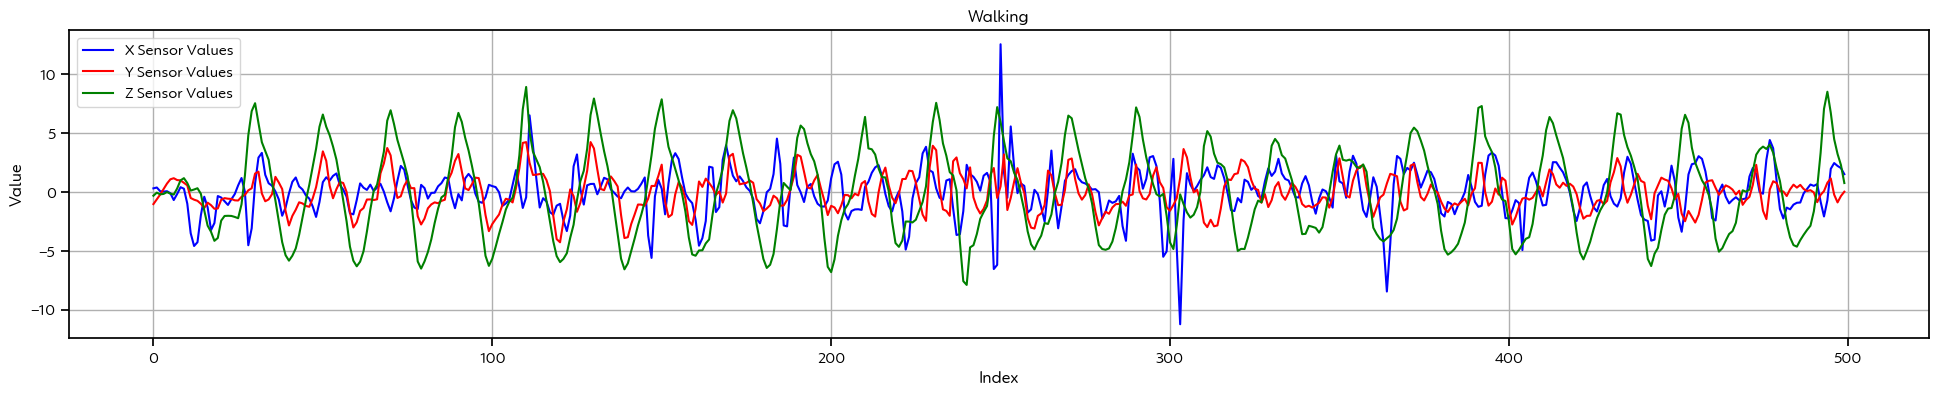

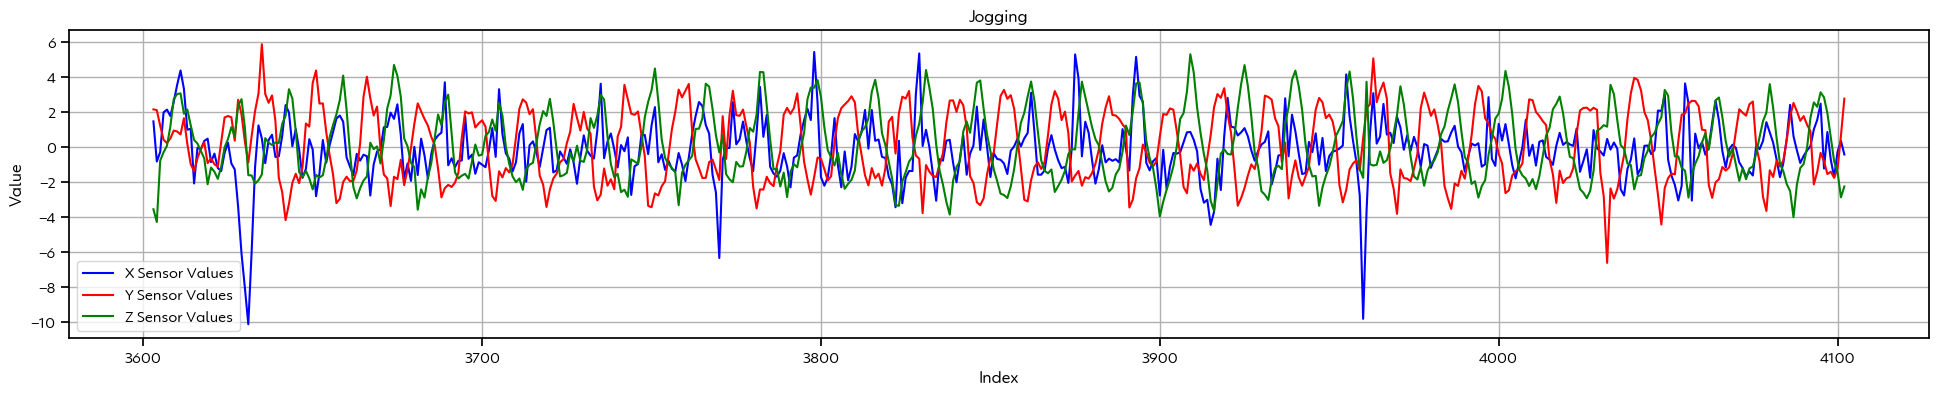

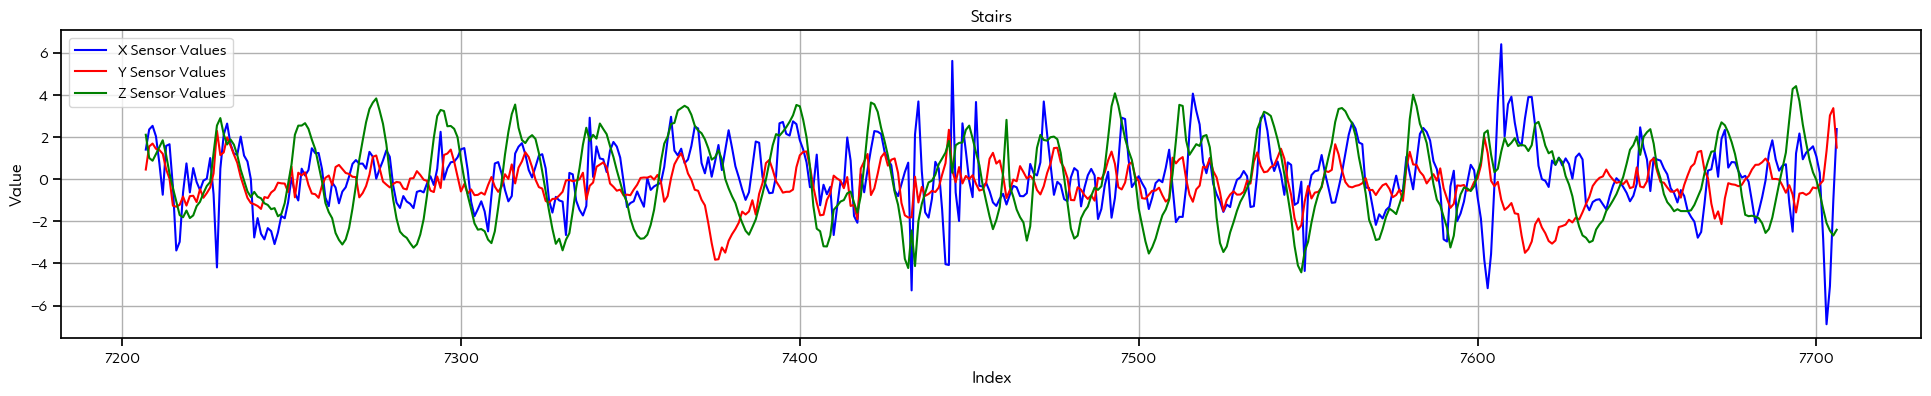

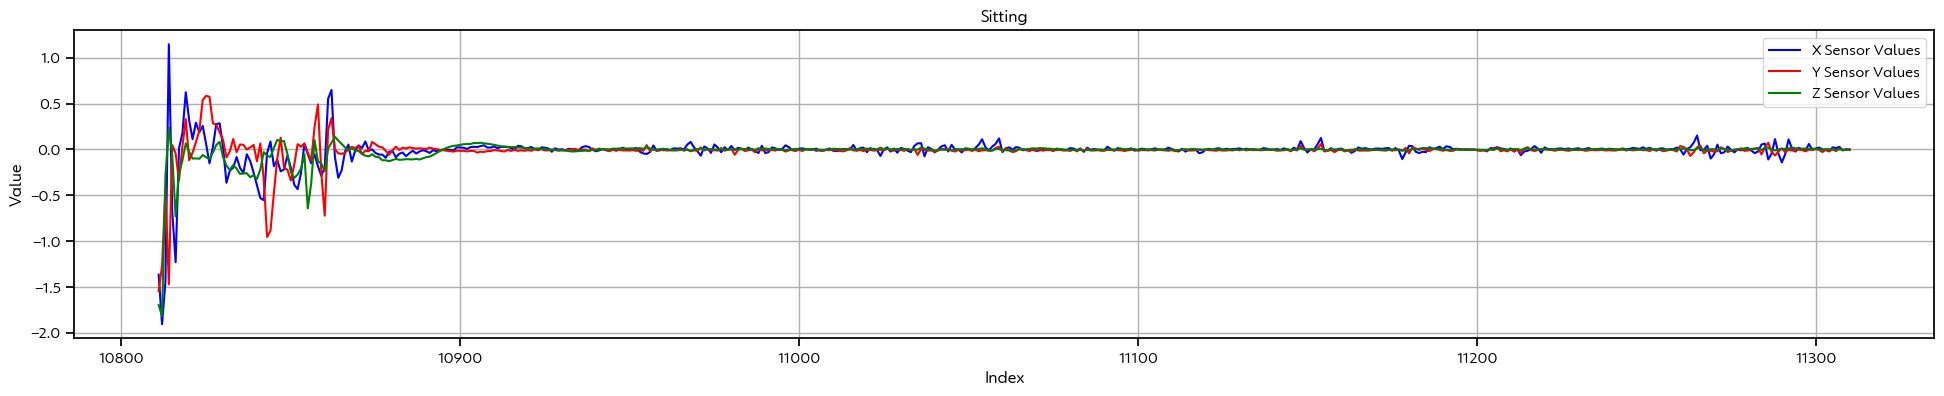

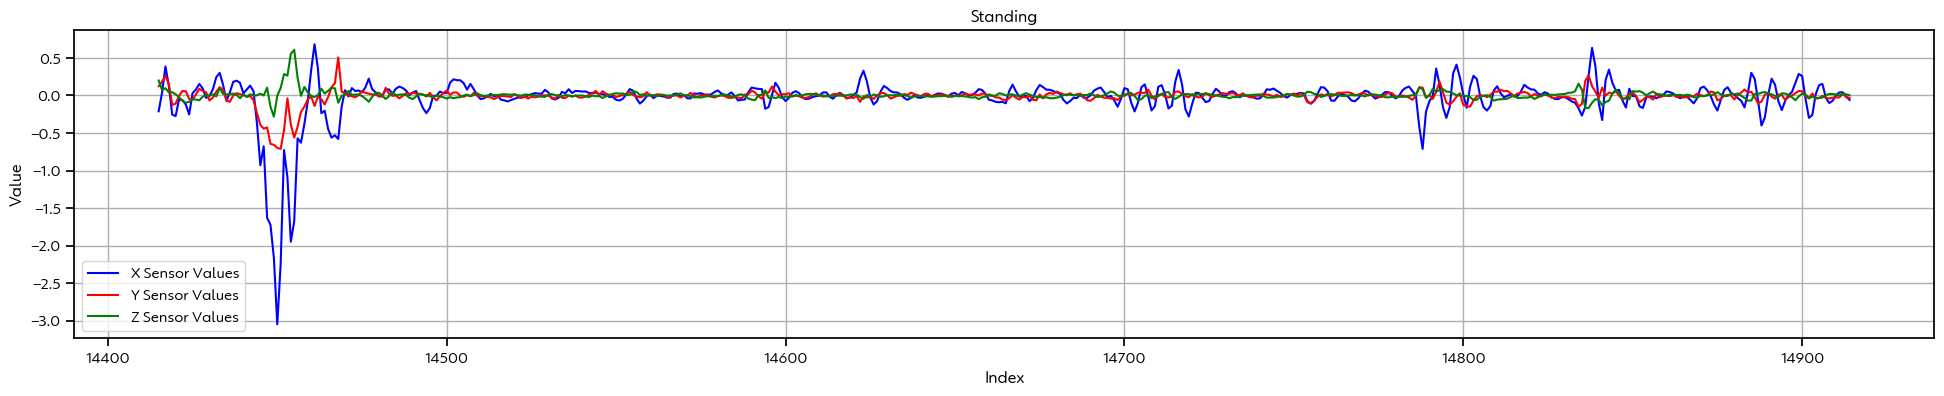

In [45]:
def plot_activity(activity, df):
    plt.figure(figsize=(24, 4))  # Adjust the figure size as needed
    data = df[df['activity'] == activity][['x', 'y', 'z']][:500]  # Limit data to first 500 rows for clarity
    
    plt.plot(data.index, data['x'], color='b', label='X Sensor Values')
    plt.plot(data.index, data['y'], color='r', label='Y Sensor Values')
    plt.plot(data.index, data['z'], color='g', label='Z Sensor Values')
    
    plt.title(activity)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
# Example usage
activities = ['Walking', 'Jogging', 'Stairs', 'Sitting', 'Standing']
for activity in activities:
    plot_activity(activity, filtered_watchacc)
    
# Example usage
activities = ['Walking', 'Jogging', 'Stairs', 'Sitting', 'Standing']
for activity in activities:
    plot_activity(activity, filtered_watchgyr)

## Discussion

The displayed ten graphs correlates to the previous five activity data discussion.The viewed ten linear graphs is similar to the bar graphs given, it only differs in its visualization. The x, y, and z-axis correspond to the inclination of points in the bar plot graph. This linear graph exhibits a great presentation of understanding the closeness and depth and width of the motion of the sensory values. It can be observed that in both acceleration and gyroscope for the device watch, walking, jogging, and stairs activity shows a great level of degree in the motion sensor. The lines are more evident in its curves, wavelength, or even amplitude rather than the sitting and standing. This could imply that with walking, jogging, and stairs activity, it all exerts a level of effort in the users movement to use arm direction and motion than sitting and standing with minimal and less movement. 

 
***

In [46]:
filtered_watchacc_usermod = filtered_watchacc[filtered_watchacc['user'] == 1600]
filtered_watchgyr_usermod = filtered_watchgyr[filtered_watchgyr['user'] == 1600]

In [47]:
filtered_watchacc_usermod

,user,activity,time,x,y,z
0,1600,Walking,90426708196641,7.091625,-0.591667,8.195502
1,1600,Walking,90426757696641,4.972757,-0.158317,6.696732
2,1600,Walking,90426807196641,3.253720,-0.191835,6.107758
3,1600,Walking,90426856696641,2.801216,-0.155922,5.997625
4,1600,Walking,90426906196641,3.770868,-1.051354,7.731027
...,...,...,...,...,...,...
18021,1600,Standing,80290721936269,9.665242,-0.513856,0.640599
18022,1600,Standing,80290771869079,9.696367,-0.597653,0.549619
18023,1600,Standing,80290821801889,9.612570,-0.609624,0.552013
18024,1600,Standing,80290871734699,9.610176,-0.473154,0.552013


In [48]:
filtered_watchgyr_usermod

,user,activity,time,x,y,z
0,1600,Walking,90426757696641,0.314944,-1.022277,-0.309962
1,1600,Walking,90426807196641,0.387382,-0.618541,-0.048972
2,1600,Walking,90426856696641,0.070999,-0.209480,-0.195978
3,1600,Walking,90426906196641,0.037975,0.254976,-0.156563
4,1600,Walking,90426955696641,0.073129,0.719431,-0.001035
...,...,...,...,...,...,...
18014,1600,Standing,80290672003459,-0.037393,0.007346,-0.003665
18015,1600,Standing,80290721936269,-0.053372,-0.024612,0.018706
18016,1600,Standing,80290771869079,-0.004370,0.013738,0.006988
18017,1600,Standing,80290821801889,0.022262,0.022260,0.005923


<a name="watch_data"></a>
# Watch Data

## Acceleration

In [63]:
# Split the dataset into features (X) and labels (y)
X = filtered_watchacc_usermod[['x', 'y', 'z']]  # Features
y = filtered_watchacc_usermod['activity']  # Labels

# Encode the activity labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the features for input into the LSTM model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# For example, reshape X_train_scaled and X_test_scaled if you're using an LSTM model.

# Build the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=256, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/200


c:\Users\Ebo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5533 - loss: 1.4564 - val_accuracy: 0.5796 - val_loss: 0.8752
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6597 - loss: 0.8360 - val_accuracy: 0.7429 - val_loss: 0.7086
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6801 - val_accuracy: 0.7851 - val_loss: 0.5446
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7817 - loss: 0.5481 - val_accuracy: 0.8042 - val_loss: 0.4686
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8038 - loss: 0.4712 - val_accuracy: 0.8195 - val_loss: 0.4456
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8179 - loss: 0.4531 - val_accuracy: 0.8228 - val_loss: 0.4311
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8252 - loss: 0.4224 - val_accuracy: 0.8256 - val_loss: 0.4228
Epoch 8/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8263 - loss: 0.4220 - val_accuracy: 0.8342 - val_loss: 0.

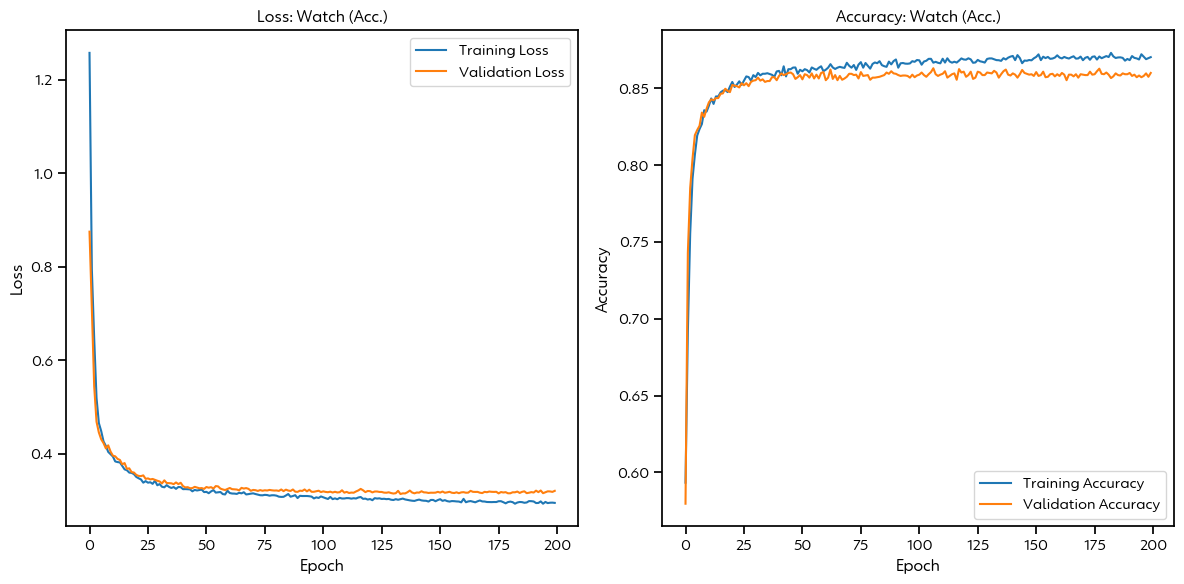

In [64]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss: Watch (Acc.)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy: Watch (Acc.)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Discussion

The graph shows the training and validation loss and accuracy of a deep learning model for classifying human activities from smartwatch accelerometer data. The x-axis represents the number of epochs, and the y-axis represents the loss or accuracy. The training loss consistently decreases over epochs, indicating that the model effectively learns to fit the training data. This trend aligns with expectations, demonstrating the model's capacity to capture underlying patterns within the dataset. However, the validation loss, while also showing a decreasing trend, remains consistently higher than the training loss. This discrepancy suggests that the model may be starting to overfit the training data, leading to reduced generalization performance on unseen data.  

Moreover, the training accuracy steadily increases over epochs reaching a value close to 1, indicating that the model successfully learns to classify activities within the training set. This upward trajectory underscores the model's ability to discern patterns and features indicative of different activities. Moreover, the validation accuracy curve also shows an increasing trend, though it is not as consistent as the training accuracy curve. It reaches a value of around 0.8, which is a good indication that the model is generalizing to unseen data.  

Overall, The fact that the model achieves high training accuracy and the validation accuracy is reasonably high suggests that it is capable of learning the patterns in the data and generalizing to unseen data.
 
***

In [65]:
# Predict labels for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred_classes, target_names=encoder.classes_)
print("Classification Report:")
print(class_report)

# Compute accuracy
accuracy = (y_pred_classes == y_test).mean()
print("Accuracy:", accuracy)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[640   4  51   3  18]
 [  2 709   0   0   1]
 [ 33   0 564  11 149]
 [  1   0   3 694   2]
 [ 25   2 191   9 494]]
Classification Report:
              precision    recall  f1-score   support

     Jogging       0.91      0.89      0.90       716
     Sitting       0.99      1.00      0.99       712
      Stairs       0.70      0.75      0.72       757
    Standing       0.97      0.99      0.98       700
     Walking       0.74      0.69      0.71       721

    accuracy                           0.86      3606
   macro avg       0.86      0.86      0.86      3606
weighted avg       0.86      0.86      0.86      3606

Accuracy: 0.8599556295063783


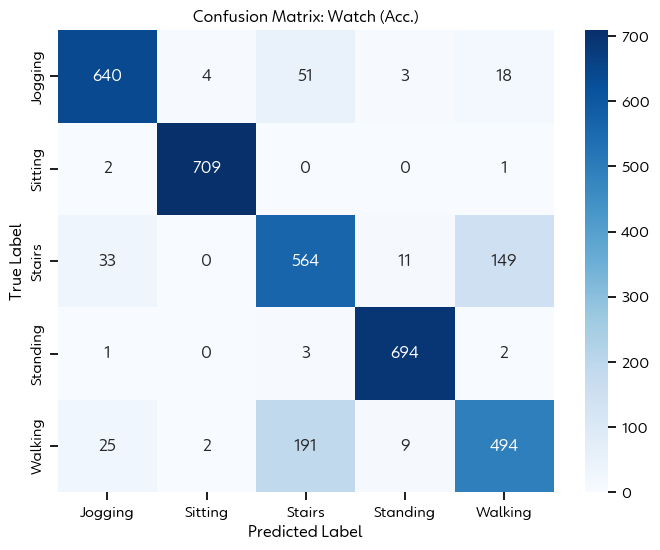

In [66]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix: Watch (Acc.)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Discussion

The confusion matrix shows the performance of a deep learning model on classifying five human activities: standing, sitting, walking, jogging, and going up/down stairs. The rows represent the actual labels, and the columns represent the predicted labels. Each cell in the table shows the number of instances where the model predicted a certain activity label (column) given the actual activity label (row). A perfect classification would be represented by a diagonal matrix where all the non-zero elements are located.  

The model demonstrates an overall accuracy of approximately 86%, indicating proficient classification performance across various activity classes. However, a closer examination of class-specific performance reveals varying degrees of proficiency across different activities. 

1. Sitting: The model performed exceptionally well in classifying sitting activity, achieving a precision (99%), recall (100%), and F1-score (99%) close to 1. This suggests that the model can very accurately distinguish sitting activity from other activities. 

2. Standing: Standing activity classification is also very good, with precision (97%), recall (99%), and F1-score (98%) all above 95%. 

3. Jogging: Jogging classification is also decent, with precision (91%), recall (89%), and F1-score (90%) in the high 80s. 

4. Walking: Walking classification is the weakest among the five activities, with precision (74%), recall (69%), and F1-score (71%) all below 80%. The model seems to be having some difficulty distinguishing walking from other activities, particularly classifying some walking instances as standing or jogging. 

5. Stairs: Stair classification is similar to walking, with precision (70%), recall (75%), and F1-score (72%) in the low to mid 70s. The model appears to be confusing stairs with other activities such as walking. 
 
***

## Gyroscope

In [59]:
# Split the dataset into features (X) and labels (y)
X = filtered_watchgyr_usermod[['x', 'y', 'z']]  # Features
y = filtered_watchgyr_usermod['activity']  # Labels

# Encode the activity labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the features for input into the LSTM model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# For example, reshape X_train_scaled and X_test_scaled if you're using an LSTM model.

# Build the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=256, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/200


c:\Users\Ebo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3797 - loss: 1.5482 - val_accuracy: 0.4251 - val_loss: 1.2920
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4259 - loss: 1.2265 - val_accuracy: 0.5366 - val_loss: 1.0374
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4961 - loss: 1.0408 - val_accuracy: 0.6326 - val_loss: 0.8920
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5621 - loss: 0.9167 - val_accuracy: 0.6540 - val_loss: 0.8254
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5970 - loss: 0.8515 - val_accuracy: 0.6490 - val_loss: 0.7999
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6148 - loss: 0.8383 - val_accuracy: 0.6507 - val_loss: 0.7842
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6327 - loss: 0.8105 - val_accuracy: 0.6604 - val_loss: 0.7731
Epoch 8/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6436 - loss: 0.8001 - val_accuracy: 0.6645 - val_loss: 0.

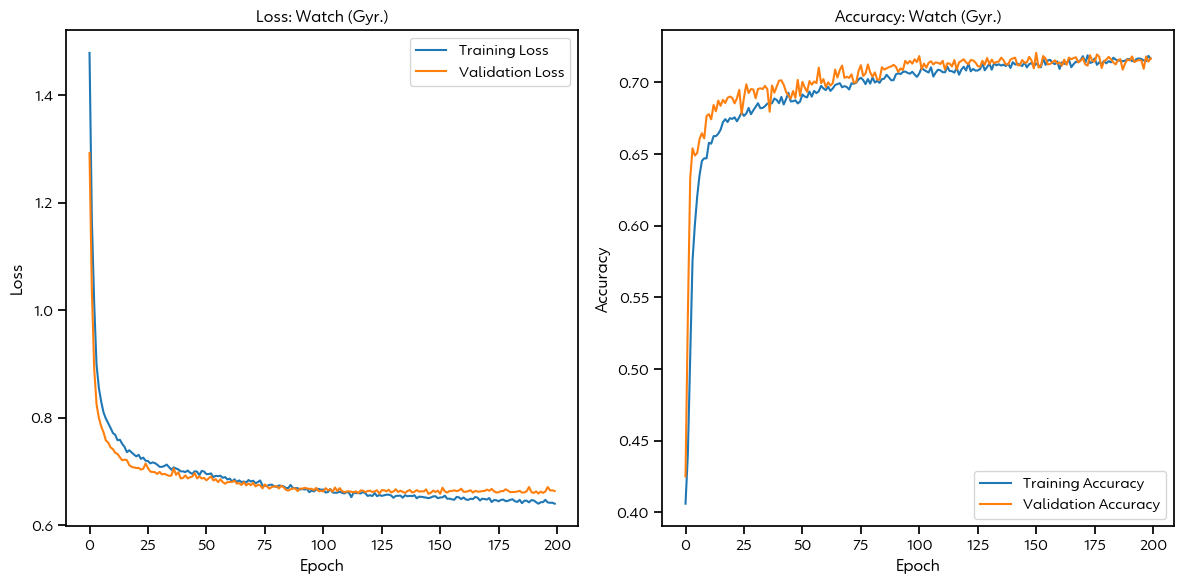

In [60]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss: Watch (Gyr.)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy: Watch (Gyr.)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Discussion

The visualization of the training and validation loss and accuracy of a deep learning model for classifying human activities from smartwatch gyroscope data exhibits patterns analogous to those observed in the accelerometer model. This is because the accelerometers and gyroscopes in smartwatches measure similar movements of the body. The accelerometers measure linear acceleration, while the gyroscopes measure angular velocity.  

Notably, the training loss demonstrates a consistent decrease over epochs, indicating the model's capacity to learn and fit the training data. Similarly, the validation loss follows a decreasing trend, albeit consistently higher than the training loss, implying potential overfitting to the training data. Concurrently, the training accuracy exhibits a steady increase, reflecting the model's ability to correctly classify activities within the training set. However, the validation accuracy, while improving over time, lags behind the training accuracy, suggesting diminishing generalization performance. These observations echo those seen in the accelerometer model, indicating that the gyroscope deep learning model faces similar challenges of overfitting to the training data. Consequently, while the gyroscope model demonstrates moderate proficiency in classifying activities within the training data, caution is warranted regarding its ability to generalize effectively to new data. 

***

In [61]:
# Predict labels for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred_classes, target_names=encoder.classes_)
print("Classification Report:")
print(class_report)

# Compute accuracy
accuracy = (y_pred_classes == y_test).mean()
print("Accuracy:", accuracy)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[518   2 114   1  81]
 [  0 615   5 123   2]
 [ 49   0 571   8 104]
 [  0 141   8 542   1]
 [ 70   2 302   8 337]]
Classification Report:
              precision    recall  f1-score   support

     Jogging       0.81      0.72      0.77       716
     Sitting       0.81      0.83      0.82       745
      Stairs       0.57      0.78      0.66       732
    Standing       0.79      0.78      0.79       692
     Walking       0.64      0.47      0.54       719

    accuracy                           0.72      3604
   macro avg       0.73      0.72      0.71      3604
weighted avg       0.73      0.72      0.71      3604

Accuracy: 0.7167036625971143


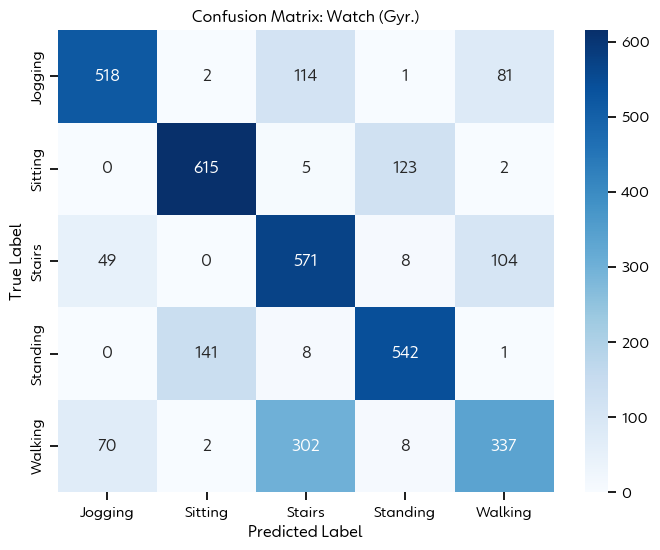

In [62]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix: Watch (Gyr.)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Discussion

The model demonstrates proficiency in accurately classifying sitting, achieving an 80% accuracy rate, which surpasses its performance with accelerometer data. This suggests that the gyroscope data, capturing detailed upper body movements, may offer richer information for distinguishing the sedentary posture of sitting. Conversely, the model's accuracy in classifying jogging and standing is notably lower compared to accelerometer data, potentially indicating the latter's superiority in capturing linear movements characteristic of these activities. Notably, challenges arise in discriminating between walking and going up/down stairs, with a significant number of misclassifications observed between these activities, mirroring findings from accelerometer data. Overall, the gyroscope model achieves a 71% accuracy on the test set, notably lower than accelerometer data, indicating that gyroscope data may be less effective for broad-ranging activity classification tasks.  

***

<a name="conc"></a>
## Conclusion and Recommendations
***
The extensive analysis of sensor readings across varied activities gives useful insights into the dynamics of human motion as collected by a watch device accelerometer (acceleration) and gyroscope. With the chosen five activities: walking, jogging, stairs, sitting, and standing, the identification of sensor reading indicates interaction between the device and its user. It highlights a significant understanding that walking fluctuates in the x-axis, jogging rises in the vertical motion of the y-axis, stairs highlight upward motions in the z-axis, while both sitting and standing displays low sensor values, indicating less dynamic arm movements. 

The analysis of the training model performance and the confusion matrix has given an insight that the provided deep learning model has identified and achieved good impact in human activities of watch for both acceleration and gyroscope. The declining trend shown in the watch data acceleration trend in loss and the convergence of training accuracy reflect the model's ability to learn and fit the training data well. The consistently greater validation loss relative to training loss implies possible overfitting, but the validation accuracy, while reasonable, reveals some variation in effectiveness of generalization. The model exhibits a good result in underlying patterns that highlights a feasible use case for future real life situations. 

Additionally, the results found in training and validation loss and accuracy in gyroscopes reflect the initialized accuracy in the accelerometer model. Indicating that both models confront comparable context. The gyroscope data is particularly useful for capturing precise upper body motions. Which shows proficiency in a detailed scope of movement such as sitting, the results emphasize the importance of taking into account sensor data when determining activity classification. Overall, similar to the acceleration training accuracy model, the gyroscope obtains a proficiency accuracy but acquires a lower accuracy rate on the test set than accelerometer data. That highlights that gyroscope data may be less helpful for applications. 

Our analysis and model establishes to help the future health and wellness field. With that, our recommendation lies on tracking the health, wellness, and medical field to enhance accuracy in classifying human activities. Our model can be used as an approach to  combine data from accelerometers and gyroscopes in wearable devices to maximize the benefits of each sensor type. Since using data from accelerometers and gyroscopes in wearable devices is a viable technique to optimize the benefits of each sensor type, identifying and enhancing wellness with human activity in-depth can be an advantage for medical personnel to lessen and prevent future health damages.

<a name="refe"></a>
## References
 
***

Mathie, M. C., Cowie, M. P., Rodriguez-Martin, D., McCormack, J. P., Wright, A. R., & Gust, D. (2014). Accelerometers: Data acquisition and processing for activity recognition. https://pubmed.ncbi.nlm.nih.gov/28303543/ 

Shoaib, M., Gupta, S. B., & Vahid, S. (2014). A survey of environmental monitoring using wearable sensors. https://ieeexplore.ieee.org/iel7/7361/8802068/08723386.pdf 

Liu, H., & Schultz, T. (2022, February). How Long Are Various Types of Daily Activities? Statistical Analysis of a Multimodal Wearable Sensor-based Human Activity Dataset. In Healthinf (pp. 680-688). 

Oniga, S., Winkler, A., & Hertzog, L. D. (2020). Human Activity Recognition using Deep Learning Models on Smartphones and Smartwatches Sensor Data. IU ScholarWorks, Indiana University Purdue University Indianapolis. Retrieved from https://arxiv.org/abs/2103.03836 

 Yu, H., Liu, A., Wei, X., & Deng, S. (2018). Deep Learning for Elderly Fall Detection: A Review. Sensors (Switzerland), 18(12), 4089. [DOI: 10.3390/s18124089] 

In [57]:
# %pip install watermark
# This can be installed if not yet installed (used Visual Studio Code, so `%` is used instead of `!`).

In [58]:
# List of all libraries and dependencies used.
import watermark

%load_ext watermark
%watermark --iversions

# This can be copied to the text file `requirements.txt`

numpy     : 1.26.3
scipy     : 1.11.4
pandas    : 2.2.0
sklearn   : 1.3.2
tensorflow: 2.16.1
watermark : 2.4.3
matplotlib: 3.8.2
seaborn   : 0.13.2

